# Matplotlib - 기본그래프 도구
- 시각화 도구 
- 그래프를 이용하면 데이터의 구조와 패턴을 파악하기 용이
- 2D 평면 그래프에 다양한 포맷과 기능 지원
- 객체지향 프로그래밍을 지원하므로 그래프 요소를 세세하게 꾸밀 수 있다
- 인공지능융합학과에서는 프로젝트 발표 할 때 많이 사용하는 라이브러리

## 1-1 선그래프

In [2]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx',header = 0) # 책에서는 fillna 지원하지 않는다고 나와있음 


In [3]:
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [4]:
df= df.fillna(method = 'ffill') 

# 따라서 fillna 메소드의 method-'ffill'사용 // 누락데이터가 들어있는 행 바로 앞에 위치한 행의 데이터 값으로 채운다.

In [6]:
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace= True)
df_seoul.set_index('전입지', inplace= True)
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


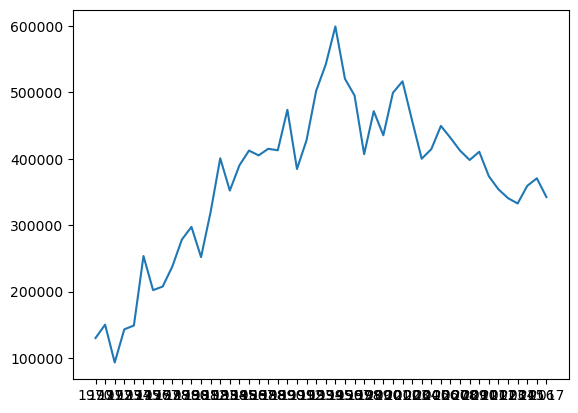

In [17]:
# df_seoul]에서 '전입지'가 '경기도'인 행 데이터를 선택하여 새 변수에 저장
sr_one = df_seoul.loc['경기도']

# x,y 축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

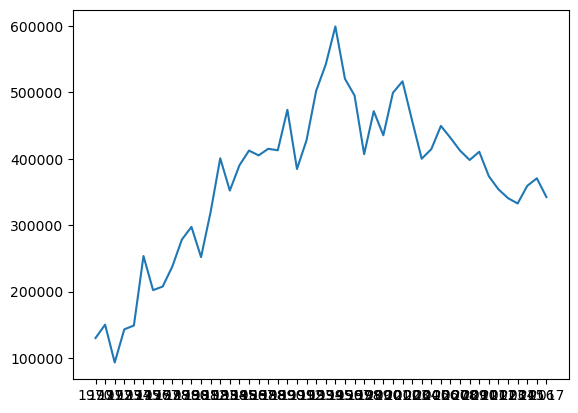

In [18]:
plt.plot(sr_one)


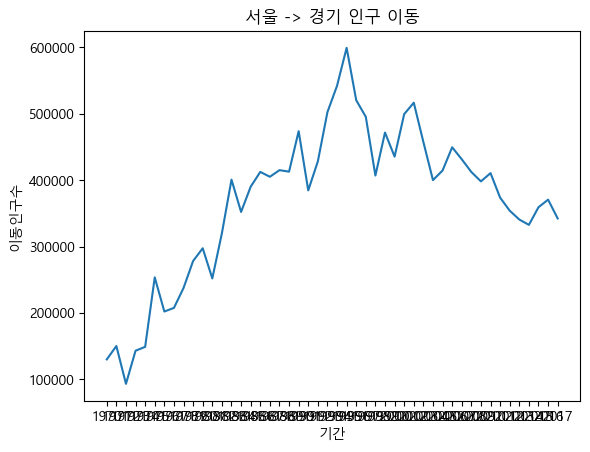

In [24]:
# x축 데이터 값들이 깨지는 것을 볼 수 있다. 이를 해결해보도록 하자.
# 이외로 matplotlib 에서 한글이 깨지거나 x,y 축 데이터 범주를 보지못해 고생하는 경우가 많다.

sr_one = df_seoul.loc['경기도']

plt.plot(sr_one.index,sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동인구수')

plt.show() # 변경사항 저장 후 출력

In [25]:
import platform
import matplotlib
from matplotlib import font_manager, rc 

matplotlib.rcParams['axes.unicode_minus'] = False  #'-' 부호가 제대로 표시되게 하는 설정 

#운영 체제마다 한글이 보이게 하는 설정 

if platform.system() == 'Windows':  # 윈도우
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name() 
    rc('font', family=font_name)
#맥
elif platform.system() == 'Darwin': 
    rc('font', family='AppleGothic')
#리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

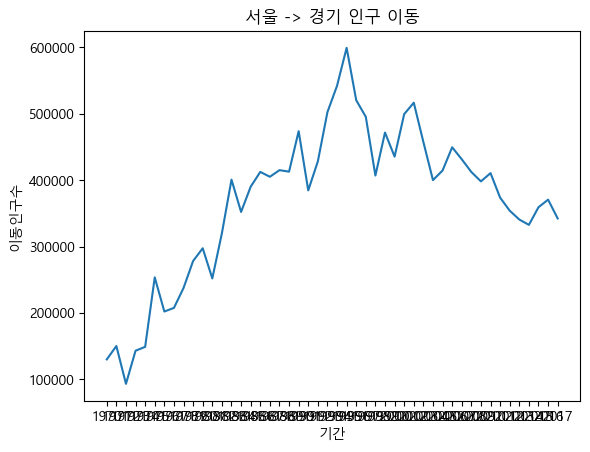

In [27]:
sr_one = df_seoul.loc['경기도']

plt.plot(sr_one.index,sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동인구수')

plt.show() # 변경사항 저장 후 출력

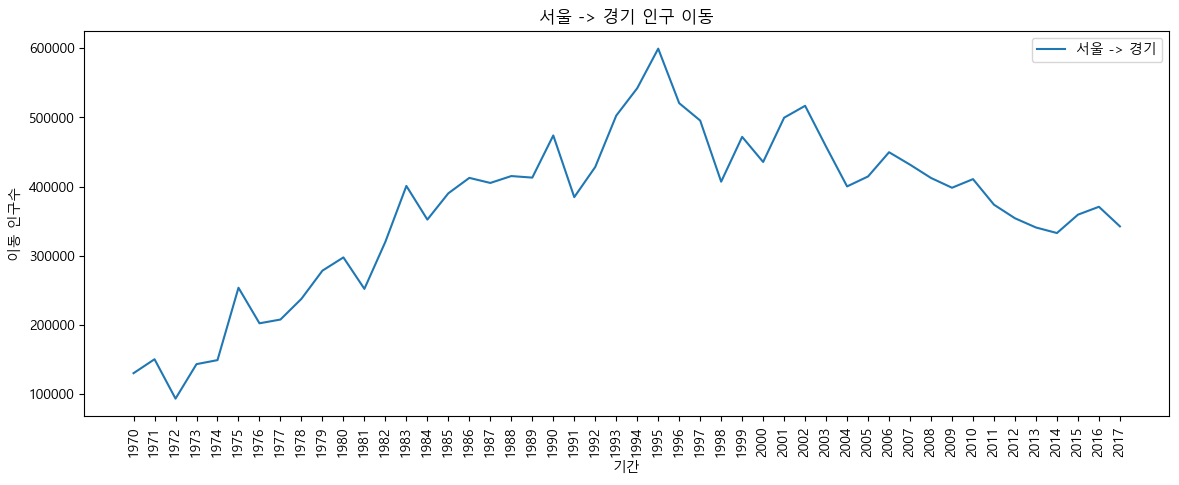

In [29]:
# 한글 폰트는 고쳤는데, x축 눈금 라벨이 서로 겹쳐 잘 안보인다. 이를 고쳐보자

sr_one = df_seoul.loc['경기도']

# 그림 사이즈 지정(가로 14인치, 세로 5안치)
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기 
plt.xticks(rotation='vertical')   # vertical 대신 숫자 입력 가능  rotation= 90 은 반시계방향으로 90도 회전 

# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동') # 차트 제목
plt.xlabel('기간') # x축 이름
plt.ylabel('이동 인구수') # y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best') # 범례 표시
plt.show()

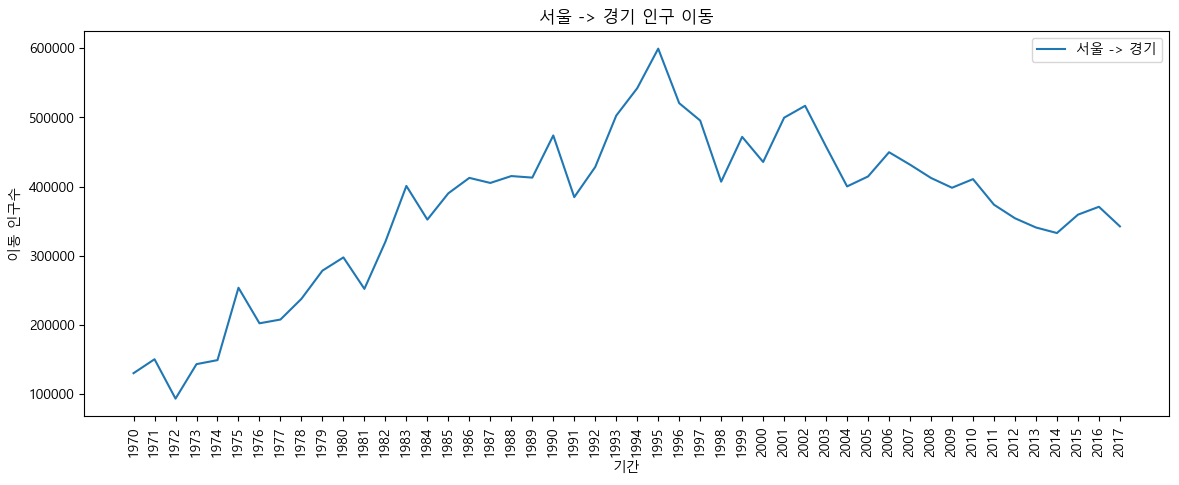

In [30]:

# 한글 폰트는 고쳤는데, x축 눈금 라벨이 서로 겹쳐 잘 안보인다. 이를 고쳐보자

sr_one = df_seoul.loc['경기도']

# 그림 사이즈 지정(가로 14인치, 세로 5안치)
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기 
plt.xticks(rotation=90)   # vertical 대신 숫자 입력 가능  rotation= 90 은 반시계방향으로 90도 회전 

# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동') # 차트 제목
plt.xlabel('기간') # x축 이름
plt.ylabel('이동 인구수') # y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best') # 범례 표시
plt.show()

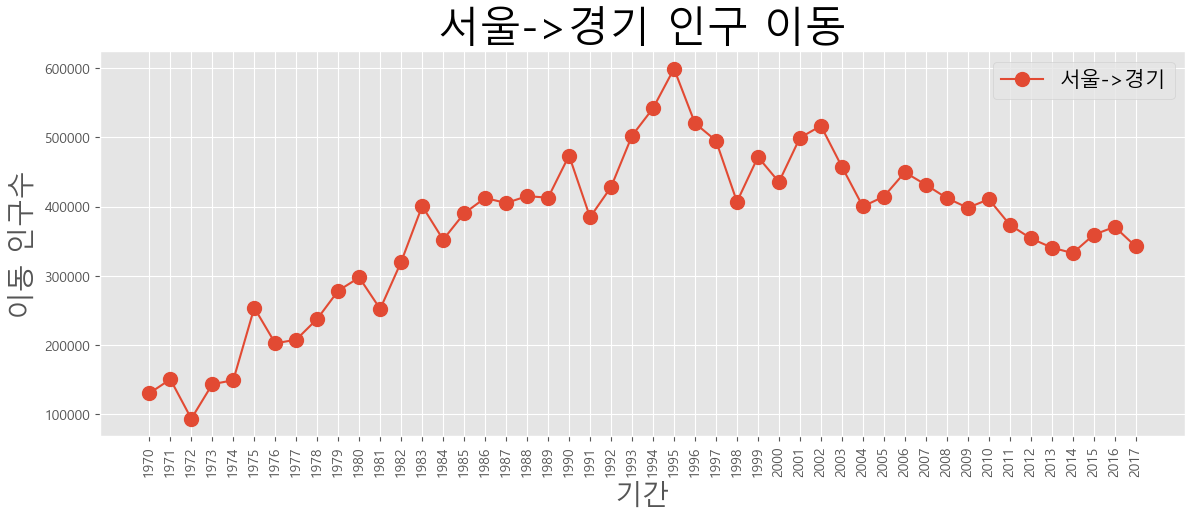

In [44]:
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정 
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation=90)

# x축,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index,sr_one.values,marker='o',markersize=10) # 마커 표시 추가

plt.title('서울->경기 인구 이동',size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels=['서울->경기'], loc='best', fontsize=15)

plt.show()

## Matplotlib 스타일 서식의 종류

- gglpot 외에도 'classic','bmh','dark_backgroud','fast','seaborn','grayscale' 등을 지원한다.
- <다음 코드에서 부터 원하는 스타일로 적용해보겠다>

In [36]:
import matplotlib.pyplot as plt

# 스타일 리스트 출력
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


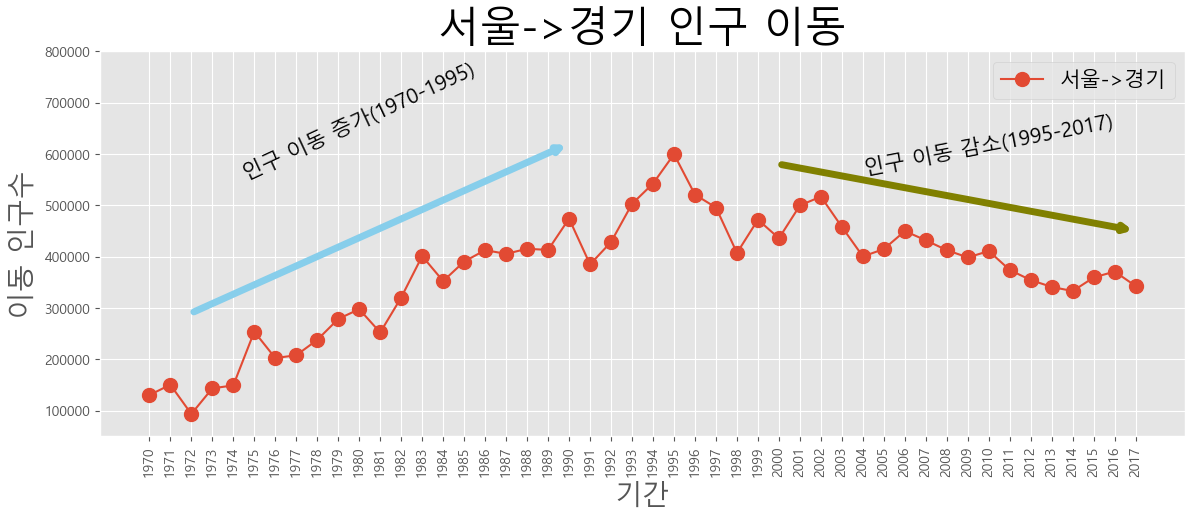

In [45]:
# 그래프에 대한 설명을 덧붙이는 주석
# annotate() 함수를 사용한다.

sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정 
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation=90)

# x축,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index,sr_one.values,marker='o',markersize=10) # 마커 표시 추가

plt.title('서울->경기 인구 이동',size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels=['서울->경기'], loc='best', fontsize=15)



plt.ylim(50000,800000)

plt.annotate('',
            xy=(20,620000),    # 화살표의 머리 부분(끝점)
            xytext=(2,290000), # 화살표의 꼬리 부분(시작점)
            xycoords='data',   # 좌표체계
            arrowprops=dict(arrowstyle='->',color='skyblue',lw=5),
            )

plt.annotate('',
            xy=(47,450000),
            xytext=(30,580000),
            xycoords='data',
            arrowprops=dict(arrowstyle='->',color='olive',lw=5),
            )

# 주석표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)',  # 텍스트 입력
            xy=(10,550000),    # 텍스트 위치 기준점
            rotation = 25,     # 텍스트 회전 각도
            va ='baseline' ,     # 텍스트 상하 정렬
            ha = 'center',       # 텍스트 좌우 정렬
            fontsize=15,       # 텍스트 크기
            )

plt.annotate('인구 이동 감소(1995-2017)',  # 텍스트 입력
            xy=(40,560000),    # 텍스트 위치 기준점
            rotation = 11,     # 텍스트 회전 각도
            va ='baseline' ,    # 텍스트 상하 정렬
            ha = 'center',       # 텍스트 좌우 정렬
            fontsize = 15,      # 텍스트 크기
            )              

plt.show()

## 화면 분할하여 그래프 여러개 그리기 - axe 객체 활용
- 화면을 여러 개로 분할하고 분활된 각 화면에 서로 다른 그래프를 그리는 방법이다. 
- 뒷 내용 생략 - !! 

C:\Users\User\AppData\Local\Temp\ipykernel_2136\1067626171.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index,rotation=75)
C:\Users\User\AppData\Local\Temp\ipykernel_2136\1067626171.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index,rotation=75)


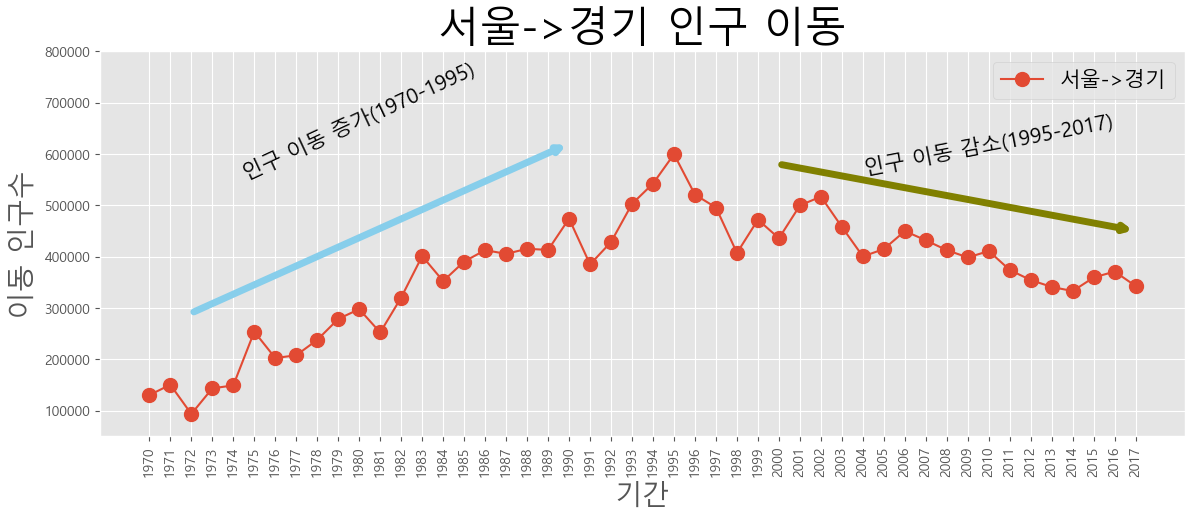

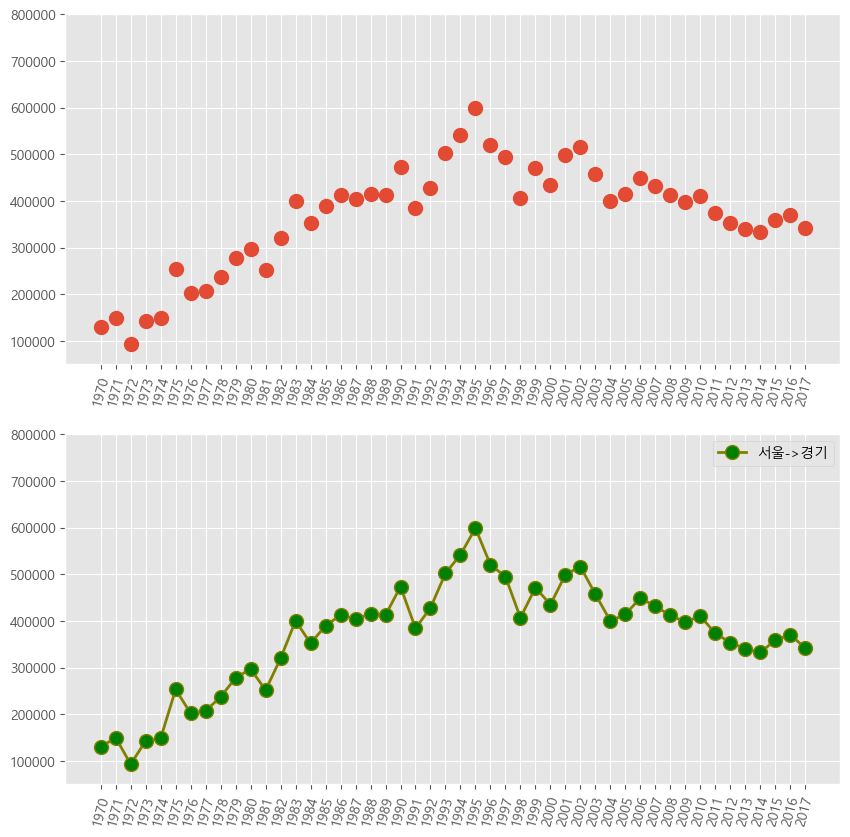

In [46]:
# 그래프에 대한 설명을 덧붙이는 주석
# annotate() 함수를 사용한다.

sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정 
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation=90)

# x축,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index,sr_one.values,marker='o',markersize=10) # 마커 표시 추가

plt.title('서울->경기 인구 이동',size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels=['서울->경기'], loc='best', fontsize=15)



plt.ylim(50000,800000)

plt.annotate('',
            xy=(20,620000),    # 화살표의 머리 부분(끝점)
            xytext=(2,290000), # 화살표의 꼬리 부분(시작점)
            xycoords='data',   # 좌표체계
            arrowprops=dict(arrowstyle='->',color='skyblue',lw=5),
            )

plt.annotate('',
            xy=(47,450000),
            xytext=(30,580000),
            xycoords='data',
            arrowprops=dict(arrowstyle='->',color='olive',lw=5),
            )

# 주석표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)',  # 텍스트 입력
            xy=(10,550000),    # 텍스트 위치 기준점
            rotation = 25,     # 텍스트 회전 각도
            va ='baseline' ,     # 텍스트 상하 정렬
            ha = 'center',       # 텍스트 좌우 정렬
            fontsize=15,       # 텍스트 크기
            )

plt.annotate('인구 이동 감소(1995-2017)',  # 텍스트 입력
            xy=(40,560000),    # 텍스트 위치 기준점
            rotation = 11,     # 텍스트 회전 각도
            va ='baseline' ,    # 텍스트 상하 정렬
            ha = 'center',       # 텍스트 좌우 정렬
            fontsize = 15,      # 텍스트 크기
            )              

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(sr_one,'o',markersize=10)
ax2.plot(sr_one, marker='o',markerfacecolor='green',markersize=10,
        color='olive', linewidth=2, label='서울->경기')
ax2.legend(loc='best')

# y축 범위 지정(최소값,최대값)
ax1.set_ylim(50000,800000)
ax2.set_ylim(50000,800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index,rotation=75)
ax2.set_xticklabels(sr_one.index,rotation=75)

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2136\4067925300.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index,rotation=75)
C:\Users\User\AppData\Local\Temp\ipykernel_2136\4067925300.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index,rotation=75)
C:\Users\User\AppData\Local\Temp\ipykernel_2136\4067925300.py:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index,rotation=75)


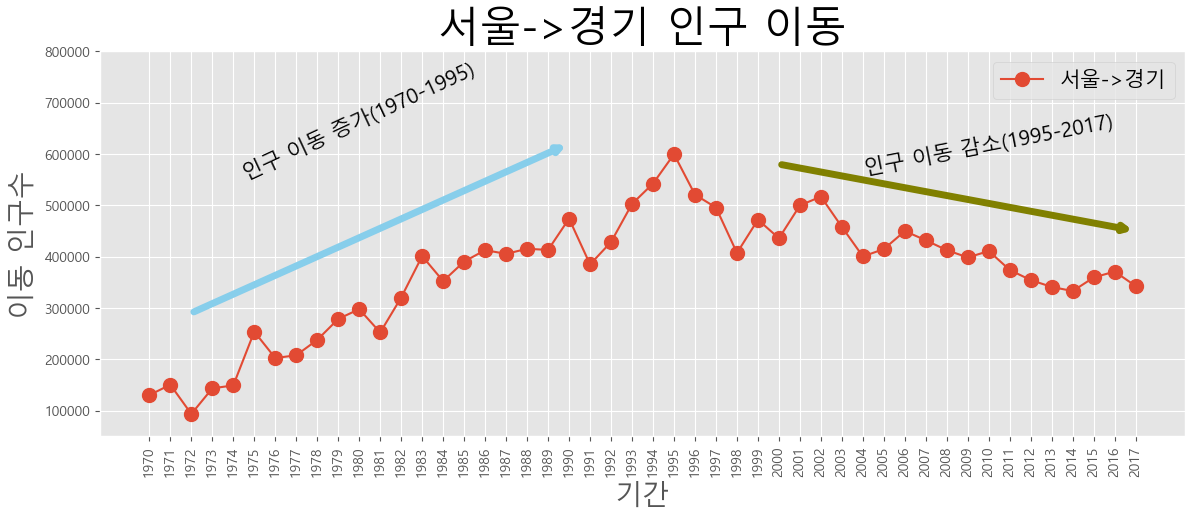

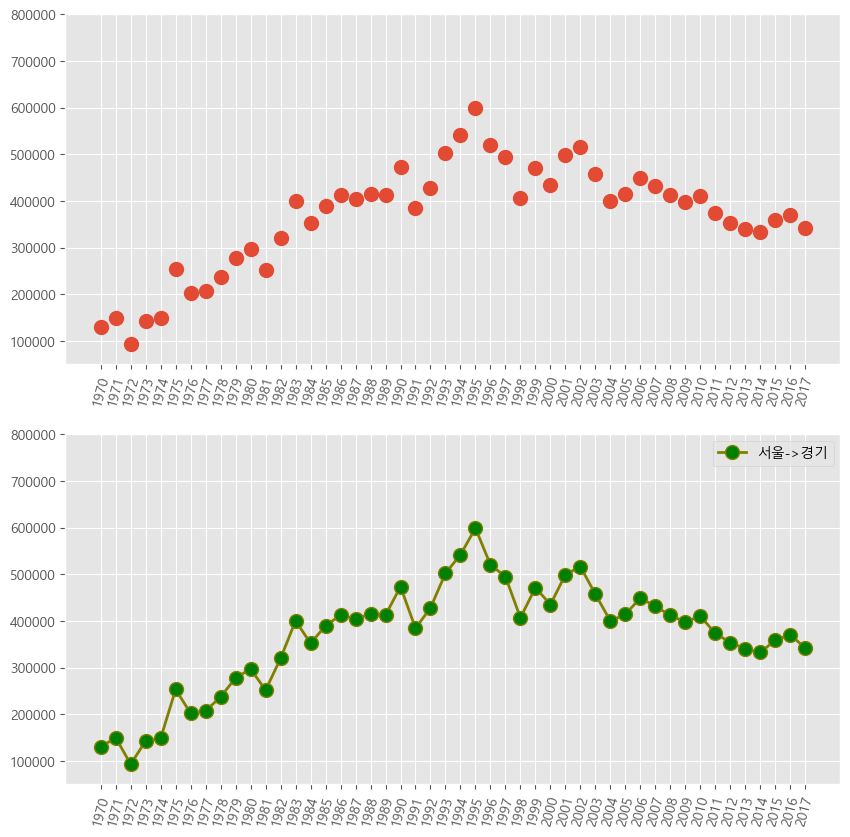

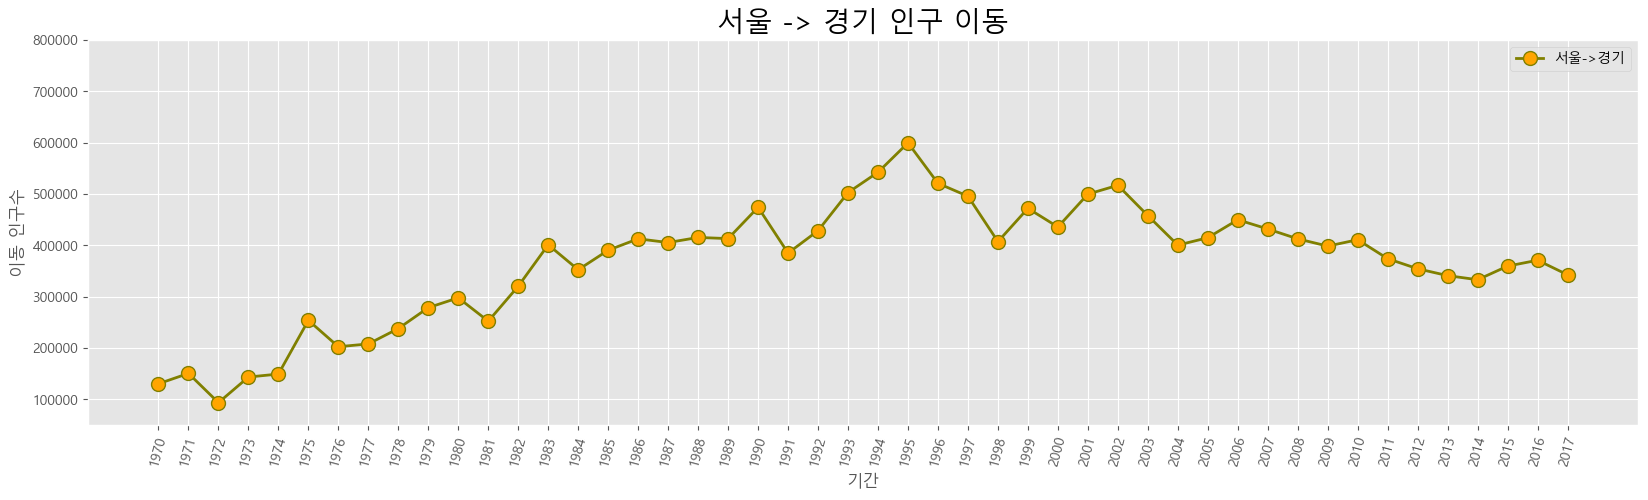

In [49]:
# 그래프에 대한 설명을 덧붙이는 주석
# annotate() 함수를 사용한다.

sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정 
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation=90)

# x축,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index,sr_one.values,marker='o',markersize=10) # 마커 표시 추가

plt.title('서울->경기 인구 이동',size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels=['서울->경기'], loc='best', fontsize=15)



plt.ylim(50000,800000)

plt.annotate('',
            xy=(20,620000),    # 화살표의 머리 부분(끝점)
            xytext=(2,290000), # 화살표의 꼬리 부분(시작점)
            xycoords='data',   # 좌표체계
            arrowprops=dict(arrowstyle='->',color='skyblue',lw=5),
            )

plt.annotate('',
            xy=(47,450000),
            xytext=(30,580000),
            xycoords='data',
            arrowprops=dict(arrowstyle='->',color='olive',lw=5),
            )

# 주석표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)',  # 텍스트 입력
            xy=(10,550000),    # 텍스트 위치 기준점
            rotation = 25,     # 텍스트 회전 각도
            va ='baseline' ,     # 텍스트 상하 정렬
            ha = 'center',       # 텍스트 좌우 정렬
            fontsize=15,       # 텍스트 크기
            )

plt.annotate('인구 이동 감소(1995-2017)',  # 텍스트 입력
            xy=(40,560000),    # 텍스트 위치 기준점
            rotation = 11,     # 텍스트 회전 각도
            va ='baseline' ,    # 텍스트 상하 정렬
            ha = 'center',       # 텍스트 좌우 정렬
            fontsize = 15,      # 텍스트 크기
            )              

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(sr_one,'o',markersize=10)
ax2.plot(sr_one, marker='o',markerfacecolor='green',markersize=10,
        color='olive', linewidth=2, label='서울->경기')
ax2.legend(loc='best')

# y축 범위 지정(최소값,최대값)
ax1.set_ylim(50000,800000)
ax2.set_ylim(50000,800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index,rotation=75)
ax2.set_xticklabels(sr_one.index,rotation=75)

# [예제 4-9]

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one,marker='o', markerfacecolor='orange',markersize=10,
       color='olive',linewidth=2,label='서울->경기')

ax.legend(loc='best')

# y축 범위 지정 ( 최소값, 최대값)
ax.set_ylim(50000,800000)

# 차트 제목 추가 
ax.set_title('서울 -> 경기 인구 이동', size = 20)

# 축 이름 추가
ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index,rotation=75)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize = 10)
ax.tick_params(axis="y", labelsize = 10)

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2136\1457291812.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index,rotation=75)
C:\Users\User\AppData\Local\Temp\ipykernel_2136\1457291812.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index,rotation=75)
C:\Users\User\AppData\Local\Temp\ipykernel_2136\1457291812.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index,rotation=75)
C:\Users\User\AppData\Local\Temp\ipykernel_2136\1457291812.py:137: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation=90)


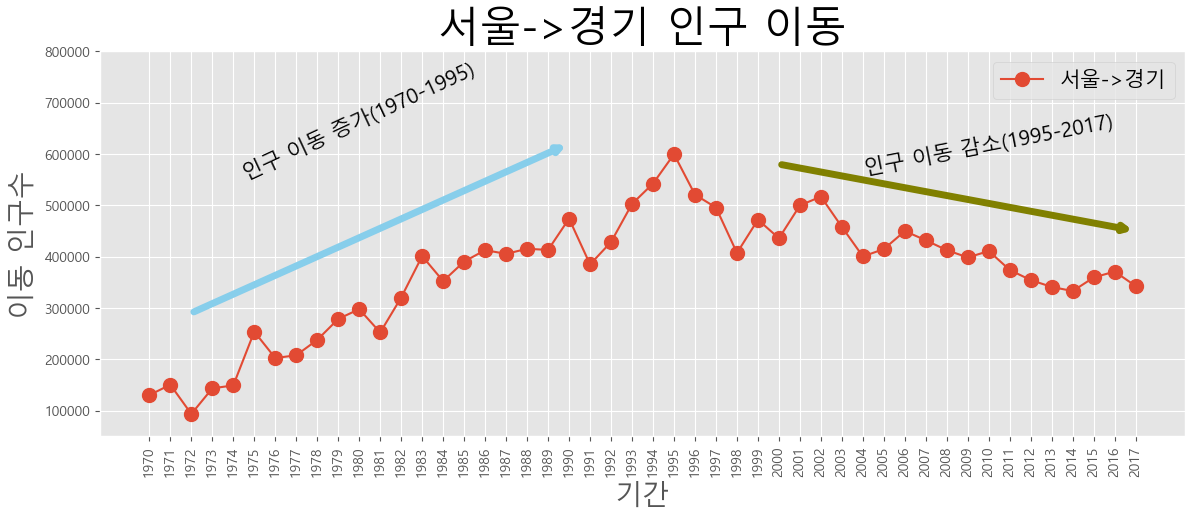

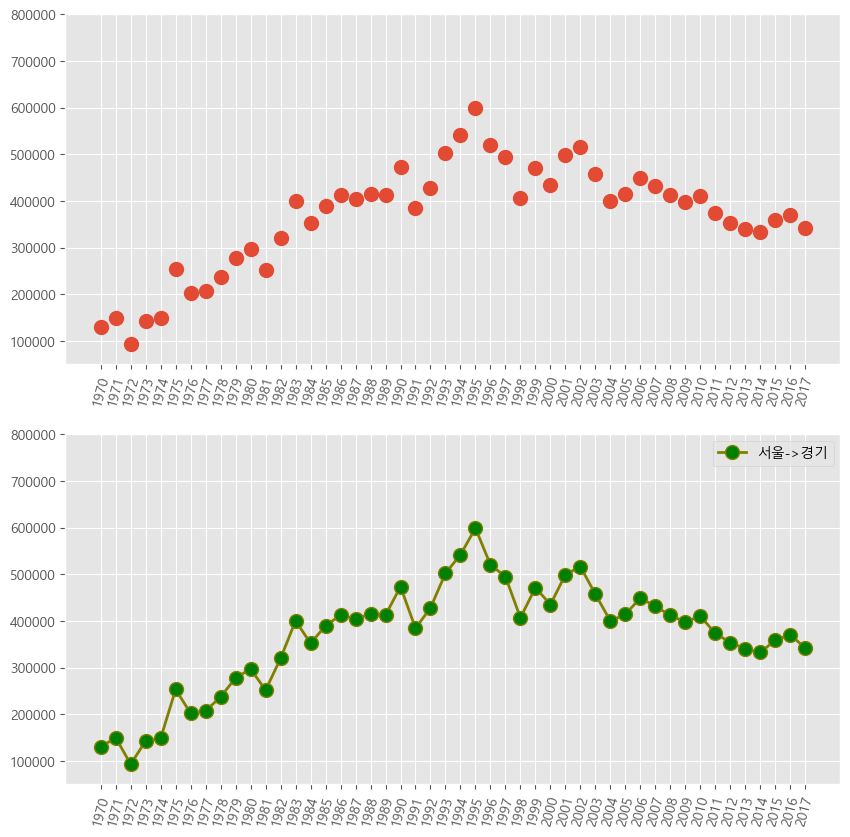

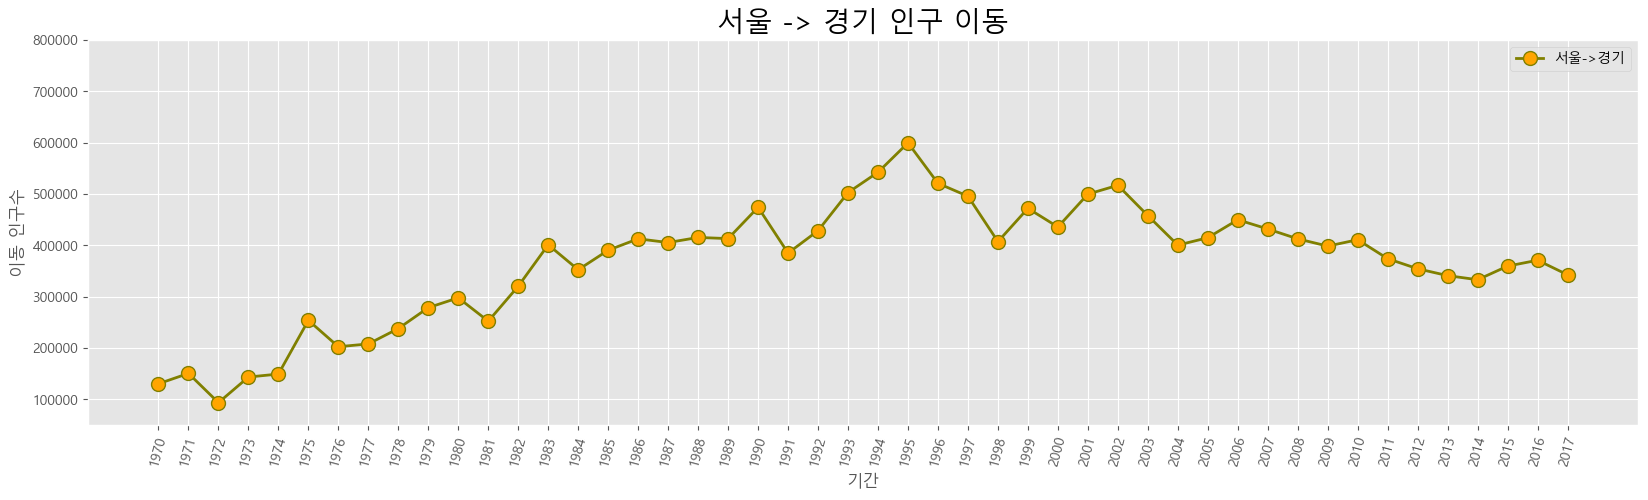

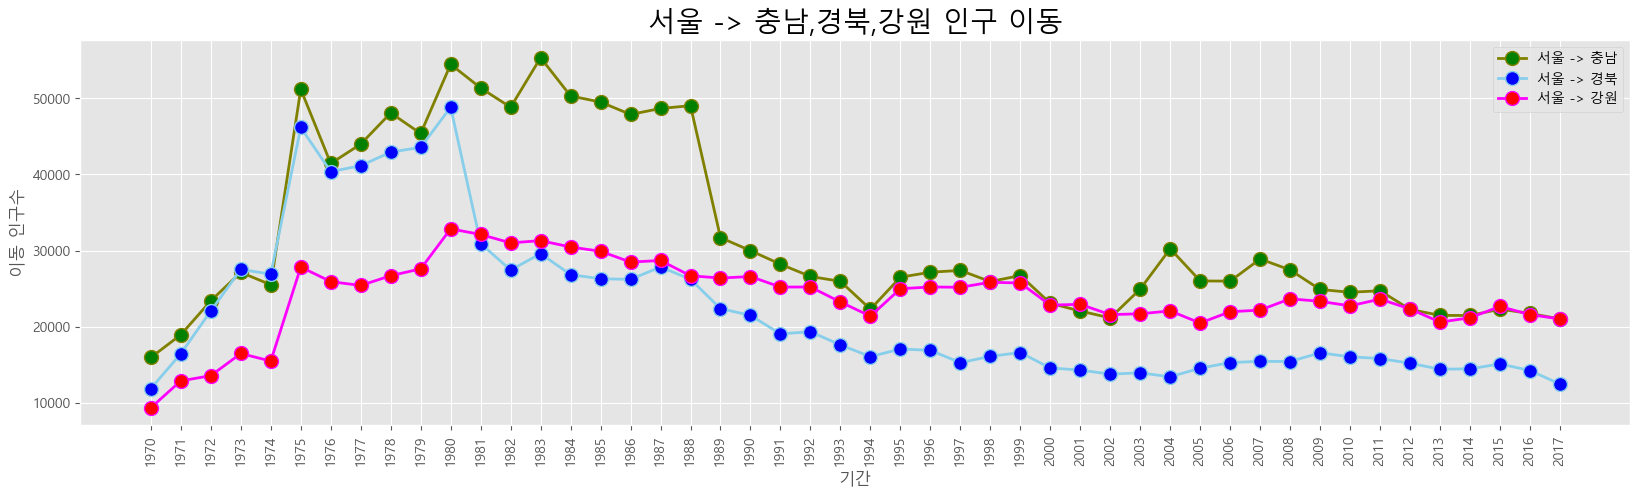

In [51]:
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정 
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation=90)

# x축,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index,sr_one.values,marker='o',markersize=10) # 마커 표시 추가

plt.title('서울->경기 인구 이동',size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels=['서울->경기'], loc='best', fontsize=15)



plt.ylim(50000,800000)

plt.annotate('',
            xy=(20,620000),    # 화살표의 머리 부분(끝점)
            xytext=(2,290000), # 화살표의 꼬리 부분(시작점)
            xycoords='data',   # 좌표체계
            arrowprops=dict(arrowstyle='->',color='skyblue',lw=5),
            )

plt.annotate('',
            xy=(47,450000),
            xytext=(30,580000),
            xycoords='data',
            arrowprops=dict(arrowstyle='->',color='olive',lw=5),
            )

# 주석표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)',  # 텍스트 입력
            xy=(10,550000),    # 텍스트 위치 기준점
            rotation = 25,     # 텍스트 회전 각도
            va ='baseline' ,     # 텍스트 상하 정렬
            ha = 'center',       # 텍스트 좌우 정렬
            fontsize=15,       # 텍스트 크기
            )

plt.annotate('인구 이동 감소(1995-2017)',  # 텍스트 입력
            xy=(40,560000),    # 텍스트 위치 기준점
            rotation = 11,     # 텍스트 회전 각도
            va ='baseline' ,    # 텍스트 상하 정렬
            ha = 'center',       # 텍스트 좌우 정렬
            fontsize = 15,      # 텍스트 크기
            )              

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(sr_one,'o',markersize=10)
ax2.plot(sr_one, marker='o',markerfacecolor='green',markersize=10,
        color='olive', linewidth=2, label='서울->경기')
ax2.legend(loc='best')

# y축 범위 지정(최소값,최대값)
ax1.set_ylim(50000,800000)
ax2.set_ylim(50000,800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index,rotation=75)
ax2.set_xticklabels(sr_one.index,rotation=75)

# [예제 4-9]

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one,marker='o', markerfacecolor='orange',markersize=10,
       color='olive',linewidth=2,label='서울->경기')

ax.legend(loc='best')

# y축 범위 지정 ( 최소값, 최대값)
ax.set_ylim(50000,800000)

# 차트 제목 추가 
ax.set_title('서울 -> 경기 인구 이동', size = 20)

# 축 이름 추가
ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index,rotation=75)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize = 10)
ax.tick_params(axis="y", labelsize = 10)

# [예제 4-10]

# 서울에서 '충청남도','경상북도','강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str,range(1970,2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(1,1,1)

# axe 객체에 plot 함수로 그래프 출력 
ax.plot(col_years, df_3.loc['충청남도'],marker='o',markerfacecolor='green',
       markersize=10,color='olive',linewidth=2,label='서울 -> 충남')

ax.plot(col_years, df_3.loc['경상북도'],marker='o',markerfacecolor='blue',
       markersize=10,color='skyblue',linewidth=2,label='서울 -> 경북')

ax.plot(col_years, df_3.loc['강원도'],marker='o',markerfacecolor='red',
       markersize=10,color='magenta',linewidth=2,label='서울 -> 강원')


# 범례 표시
ax.legend(loc='best')


# 차트 제목 추가
ax.set_title('서울 -> 충남,경북,강원 인구 이동', size=20)

# 축 이름 추가
ax.set_xlabel('기간',size = 12)
ax.set_ylabel('이동 인구수',size = 12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show() 

C:\Users\User\AppData\Local\Temp\ipykernel_2136\3280374952.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index,rotation=75)
C:\Users\User\AppData\Local\Temp\ipykernel_2136\3280374952.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index,rotation=75)
C:\Users\User\AppData\Local\Temp\ipykernel_2136\3280374952.py:97: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index,rotation=75)
C:\Users\User\AppData\Local\Temp\ipykernel_2136\3280374952.py:139: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation=90)
C:\Users\User\AppData\Local\Temp\ipykernel_2136\3280374952.py:188: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years,rotation=90)
C:\Users\User\AppData\Local\Temp\ipykernel_2136\3280374952.p

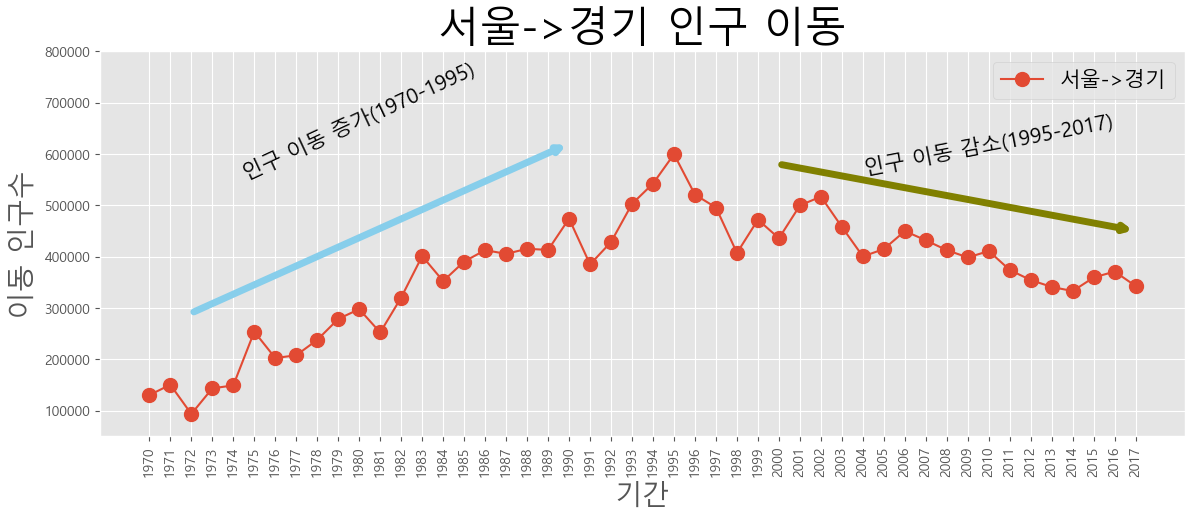

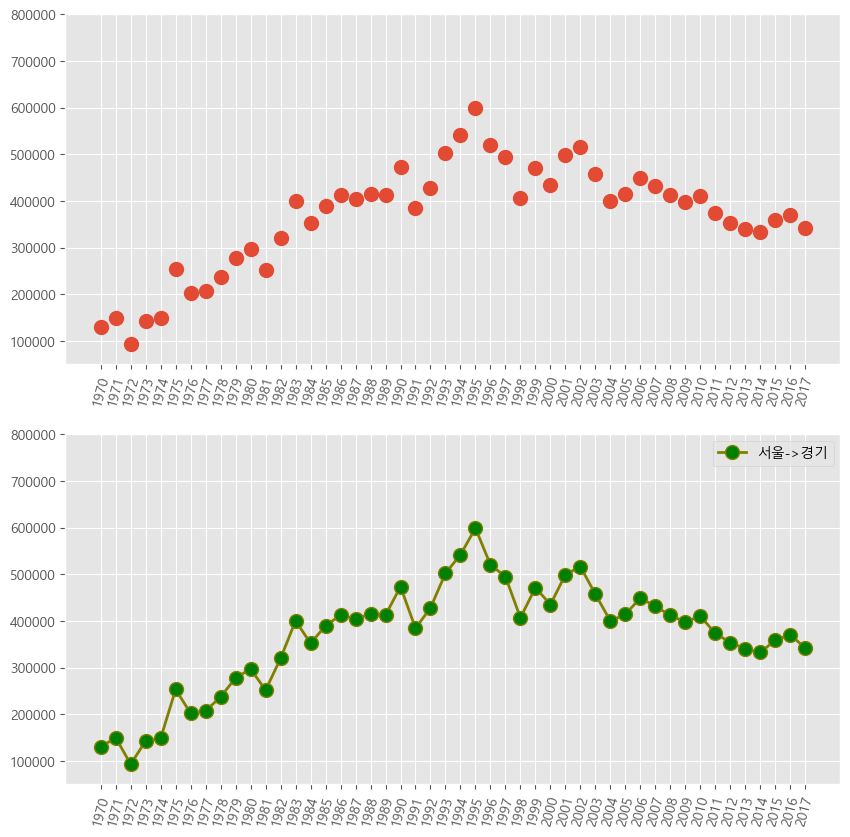

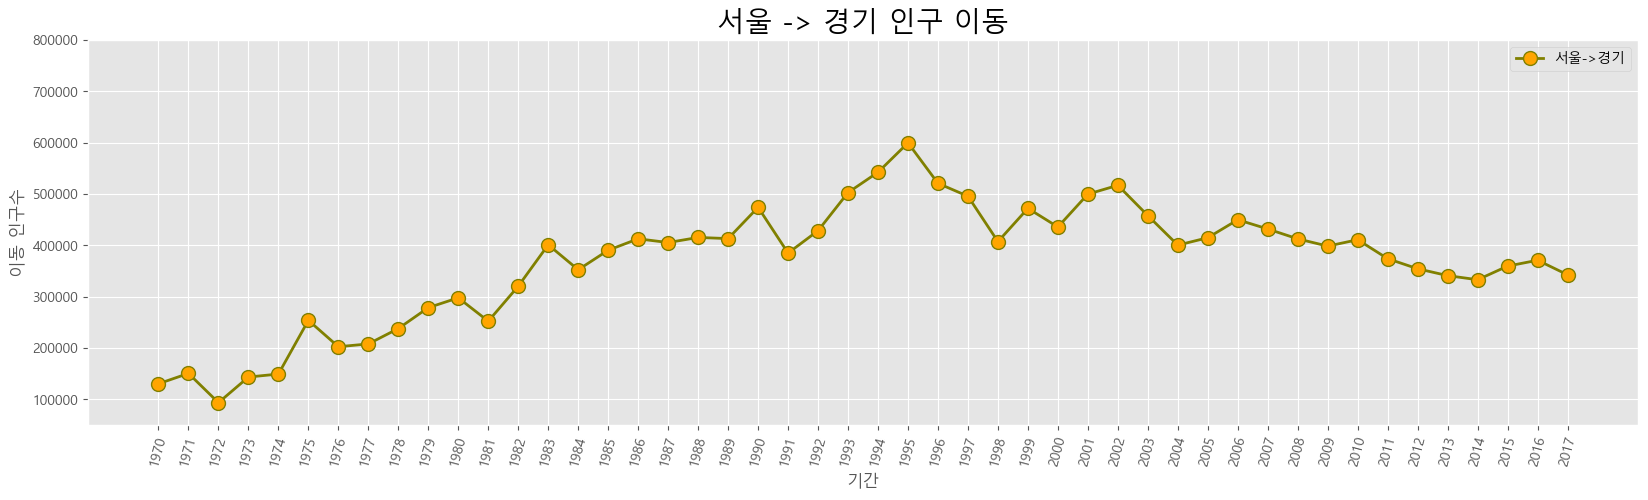

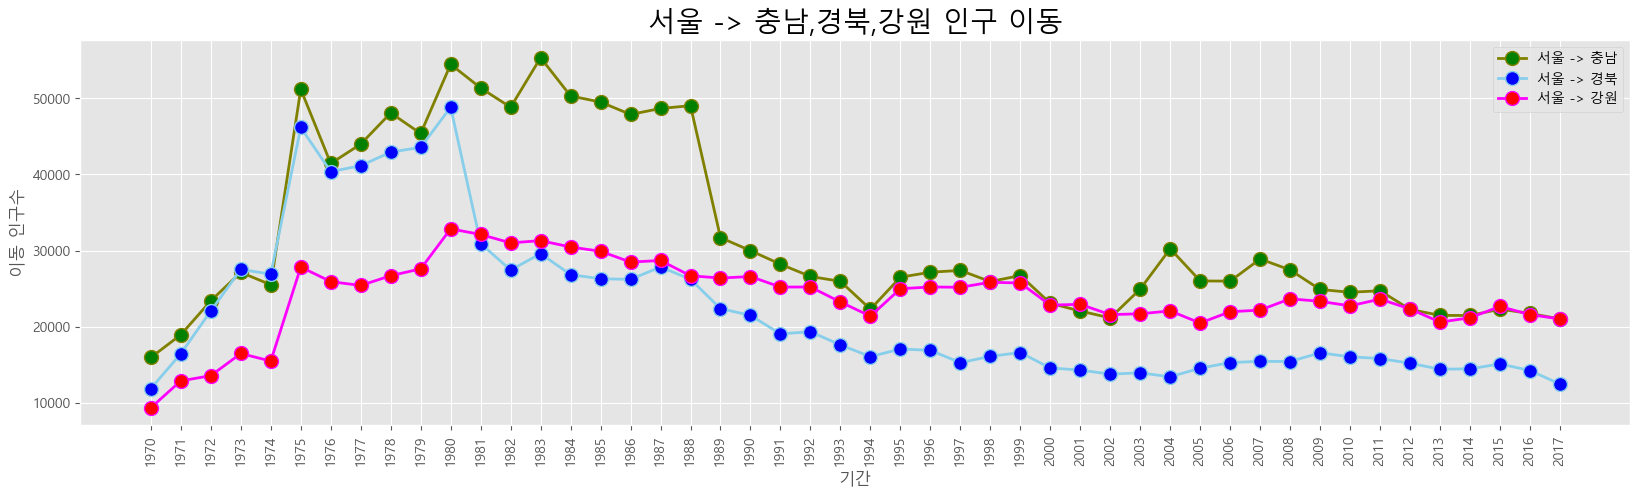

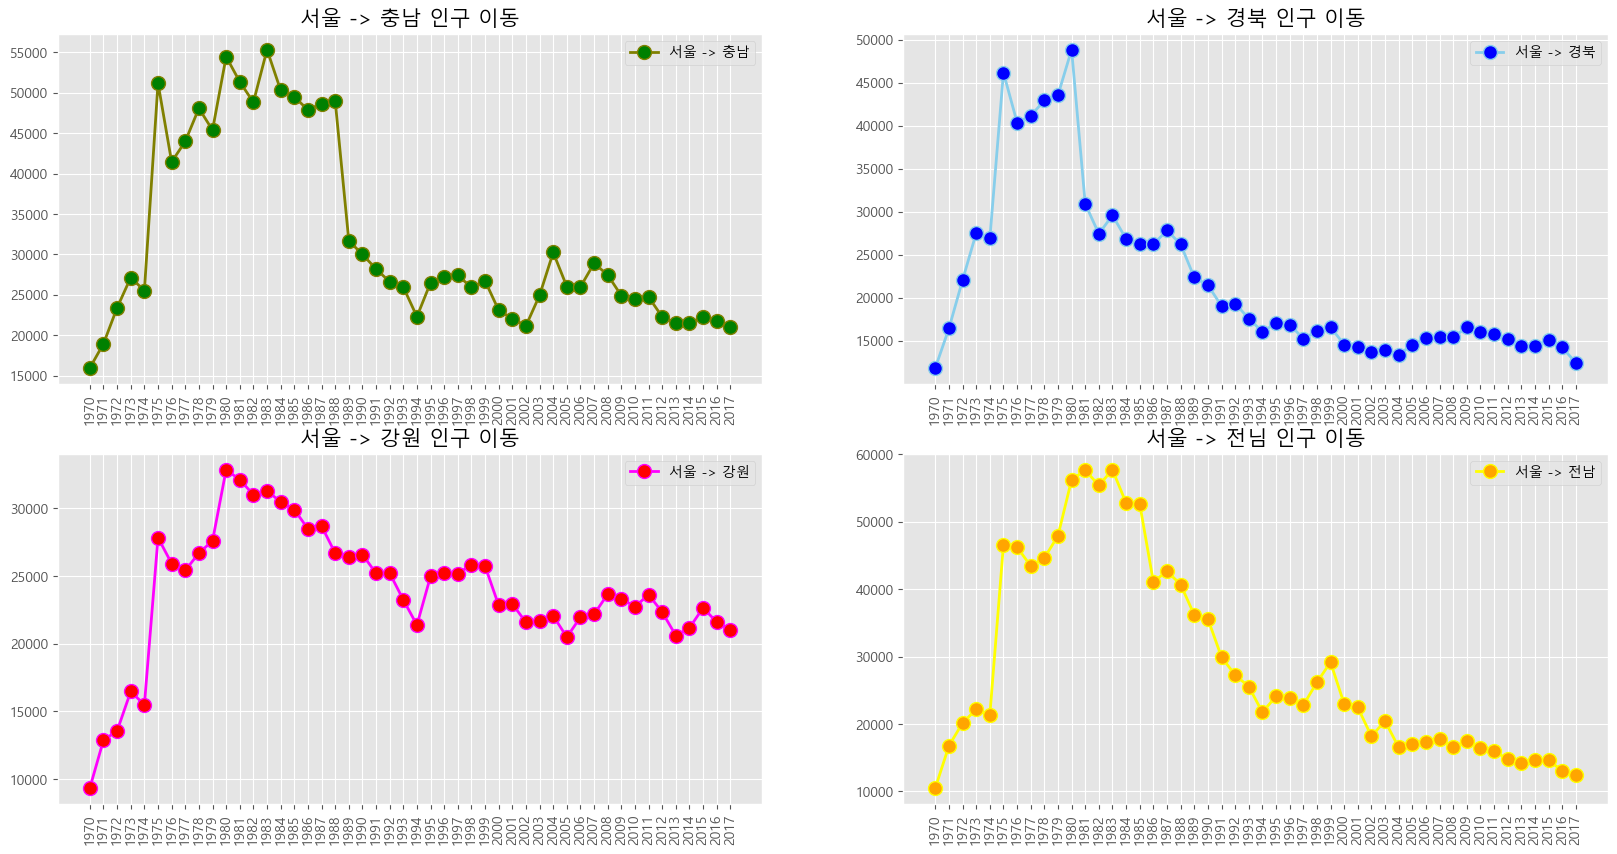

In [53]:
# 4분할 그래프 

sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정 
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation=90)

# x축,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index,sr_one.values,marker='o',markersize=10) # 마커 표시 추가

plt.title('서울->경기 인구 이동',size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels=['서울->경기'], loc='best', fontsize=15)



plt.ylim(50000,800000)

plt.annotate('',
            xy=(20,620000),    # 화살표의 머리 부분(끝점)
            xytext=(2,290000), # 화살표의 꼬리 부분(시작점)
            xycoords='data',   # 좌표체계
            arrowprops=dict(arrowstyle='->',color='skyblue',lw=5),
            )

plt.annotate('',
            xy=(47,450000),
            xytext=(30,580000),
            xycoords='data',
            arrowprops=dict(arrowstyle='->',color='olive',lw=5),
            )

# 주석표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)',  # 텍스트 입력
            xy=(10,550000),    # 텍스트 위치 기준점
            rotation = 25,     # 텍스트 회전 각도
            va ='baseline' ,     # 텍스트 상하 정렬
            ha = 'center',       # 텍스트 좌우 정렬
            fontsize=15,       # 텍스트 크기
            )

plt.annotate('인구 이동 감소(1995-2017)',  # 텍스트 입력
            xy=(40,560000),    # 텍스트 위치 기준점
            rotation = 11,     # 텍스트 회전 각도
            va ='baseline' ,    # 텍스트 상하 정렬
            ha = 'center',       # 텍스트 좌우 정렬
            fontsize = 15,      # 텍스트 크기
            )              

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(sr_one,'o',markersize=10)
ax2.plot(sr_one, marker='o',markerfacecolor='green',markersize=10,
        color='olive', linewidth=2, label='서울->경기')
ax2.legend(loc='best')

# y축 범위 지정(최소값,최대값)
ax1.set_ylim(50000,800000)
ax2.set_ylim(50000,800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index,rotation=75)
ax2.set_xticklabels(sr_one.index,rotation=75)

# [예제 4-9]

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one,marker='o', markerfacecolor='orange',markersize=10,
       color='olive',linewidth=2,label='서울->경기')

ax.legend(loc='best')

# y축 범위 지정 ( 최소값, 최대값)
ax.set_ylim(50000,800000)

# 차트 제목 추가 
ax.set_title('서울 -> 경기 인구 이동', size = 20)

# 축 이름 추가
ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index,rotation=75)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize = 10)
ax.tick_params(axis="y", labelsize = 10)

# [예제 4-10]

# 서울에서 '충청남도','경상북도','강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str,range(1970,2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(1,1,1)

# axe 객체에 plot 함수로 그래프 출력 
ax.plot(col_years, df_3.loc['충청남도'],marker='o',markerfacecolor='green',
       markersize=10,color='olive',linewidth=2,label='서울 -> 충남')

ax.plot(col_years, df_3.loc['경상북도'],marker='o',markerfacecolor='blue',
       markersize=10,color='skyblue',linewidth=2,label='서울 -> 경북')

ax.plot(col_years, df_3.loc['강원도'],marker='o',markerfacecolor='red',
       markersize=10,color='magenta',linewidth=2,label='서울 -> 강원')


# 범례 표시
ax.legend(loc='best')


# 차트 제목 추가
ax.set_title('서울 -> 충남,경북,강원 인구 이동', size=20)

# 축 이름 추가
ax.set_xlabel('기간',size = 12)
ax.set_ylabel('이동 인구수',size = 12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# 서울에서 '충청남도','경상북도','강원도','전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str,range(1970,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]

# 스타일 서식 지정 
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(col_years, df_4.loc['충청남도',:], marker='o', markerfacecolor='green',
        markersize=10, color='olive',linewidth=2, label='서울 -> 충남')

ax2.plot(col_years, df_4.loc['경상북도',:], marker='o', markerfacecolor='blue',
        markersize=10, color='skyblue',linewidth=2, label='서울 -> 경북')

ax3.plot(col_years, df_4.loc['강원도',:], marker='o', markerfacecolor='red',
        markersize=10, color='magenta',linewidth=2, label='서울 -> 강원')

ax4.plot(col_years, df_4.loc['전라남도',:], marker='o', markerfacecolor='orange',
        markersize=10, color='yellow',linewidth=2, label='서울 -> 전남')

# 범례 표시

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# 차트 제목 추가

ax1.set_title('서울 -> 충남 인구 이동', size = 15)
ax2.set_title('서울 -> 경북 인구 이동', size = 15)
ax3.set_title('서울 -> 강원 인구 이동', size = 15)
ax4.set_title('서울 -> 전님 인구 이동', size = 15)

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years,rotation=90)
ax2.set_xticklabels(col_years,rotation=90)
ax3.set_xticklabels(col_years,rotation=90)
ax4.set_xticklabels(col_years,rotation=90)


plt.show()

## matplotlib에서 사용할 수 있는 색의 종류
- matplotlib 라이브러리를 사용할 때 색상(컬러)을 지정하는 경우가 있다. 이럴 때 사용할 수 있는 색상의 종류를 확인할 수 있다면 매우 유용하다. 


In [56]:
import matplotlib

# 컬러 정보를 담을 빈 딕셔너리 생성
colors ={}

# 컬러 이름과 헥사코드를 확인하여 딕셔너리에 입력 
for name, hex in matplotlib.colors.cnames.items():
    colors[name] = hex


# 딕셔너리 출력
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

# 면적 그래프(slacked=False) 그리기 

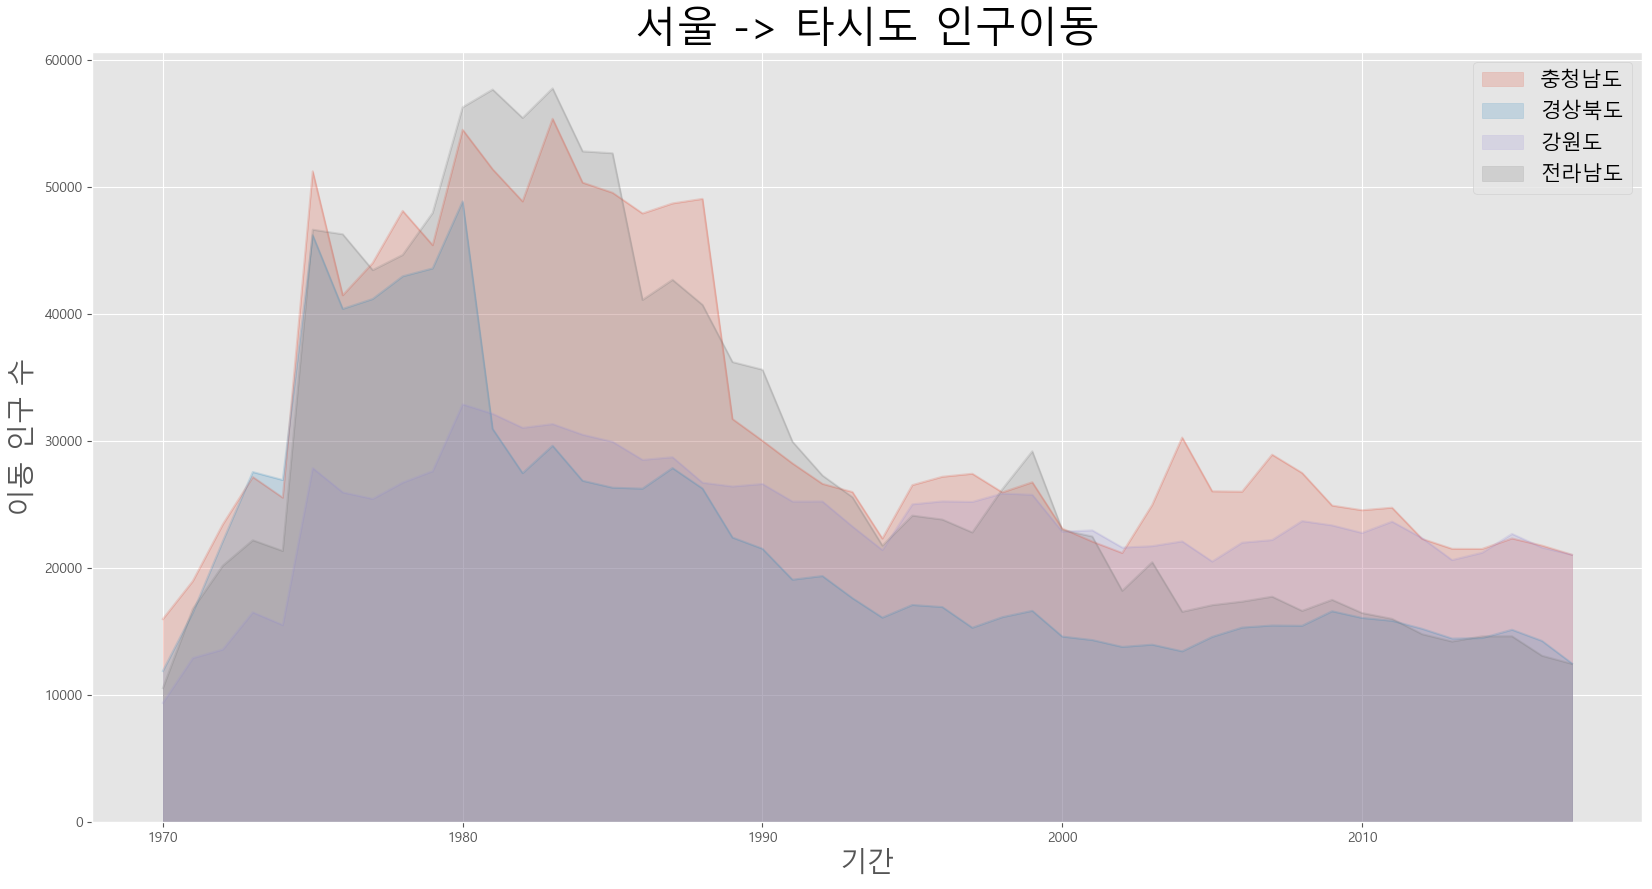

In [58]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'],axis=1)  # 1이 열 
df_seoul.rename({'전입지별':'전입지'}, axis=1 , inplace=True)
df_seoul.set_index('전입지',inplace=True) #저장 ㅎㅎ

# 서울에서 '충청남도','경상북도','강원도','전라남도'로 이동한 인구데이터 값만 선택
col_years = list(map(str,range(1970,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4 = df_4.transpose() #전치 ㅋ

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기

df_4.plot(kind='area',stacked=False, alpha=0.2, figsize=(20,10))

plt.title('서울 -> 타시도 인구이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best',fontsize=15)

plt.show()

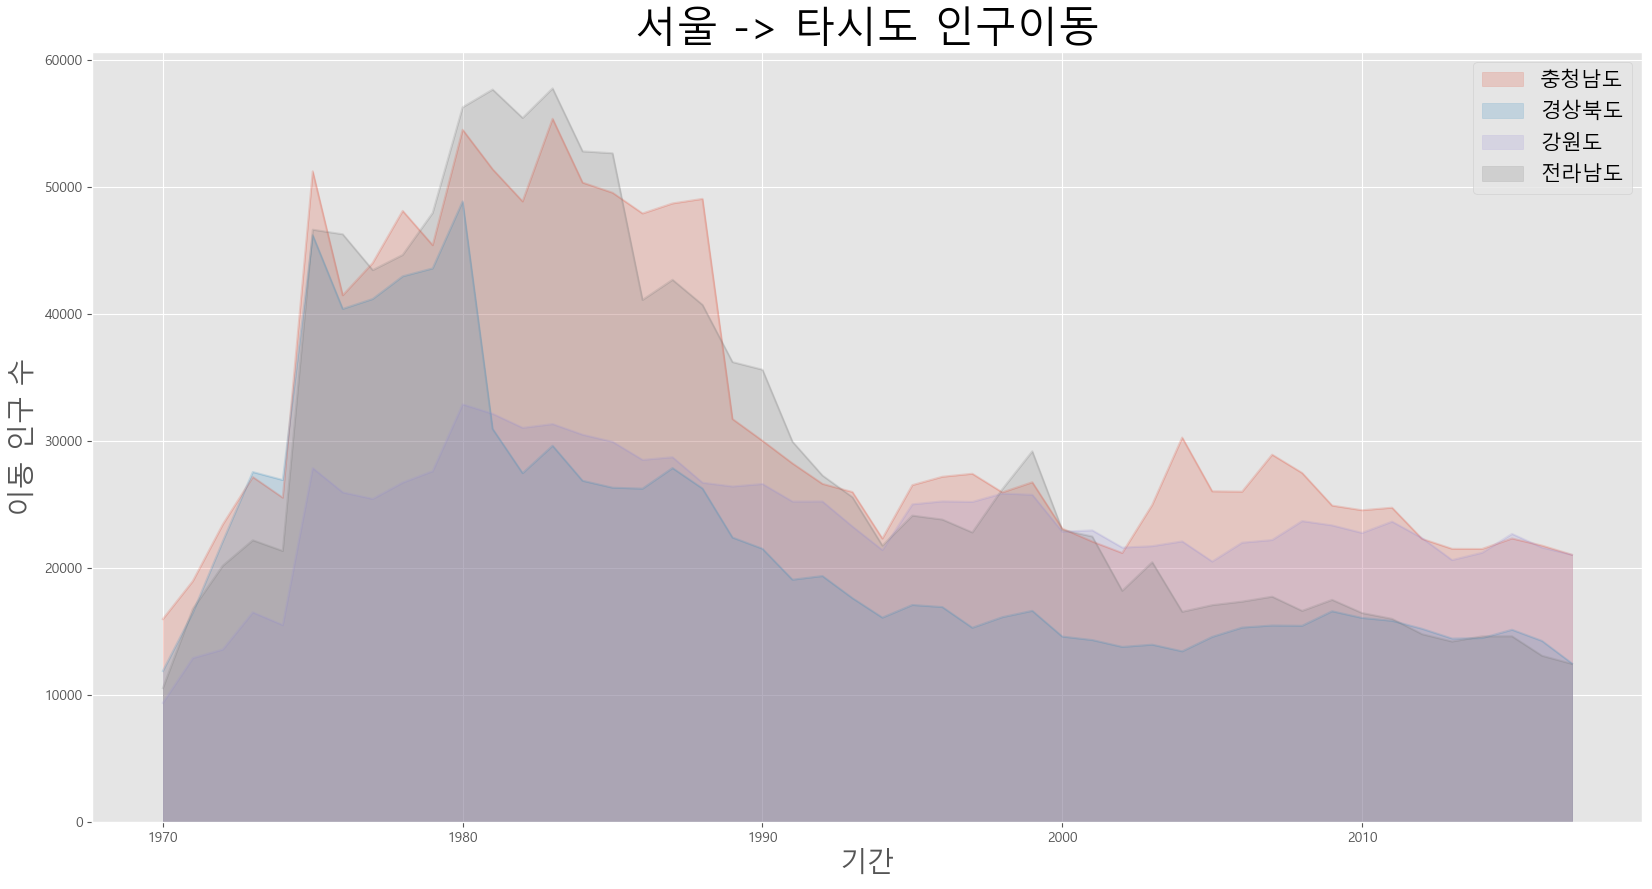

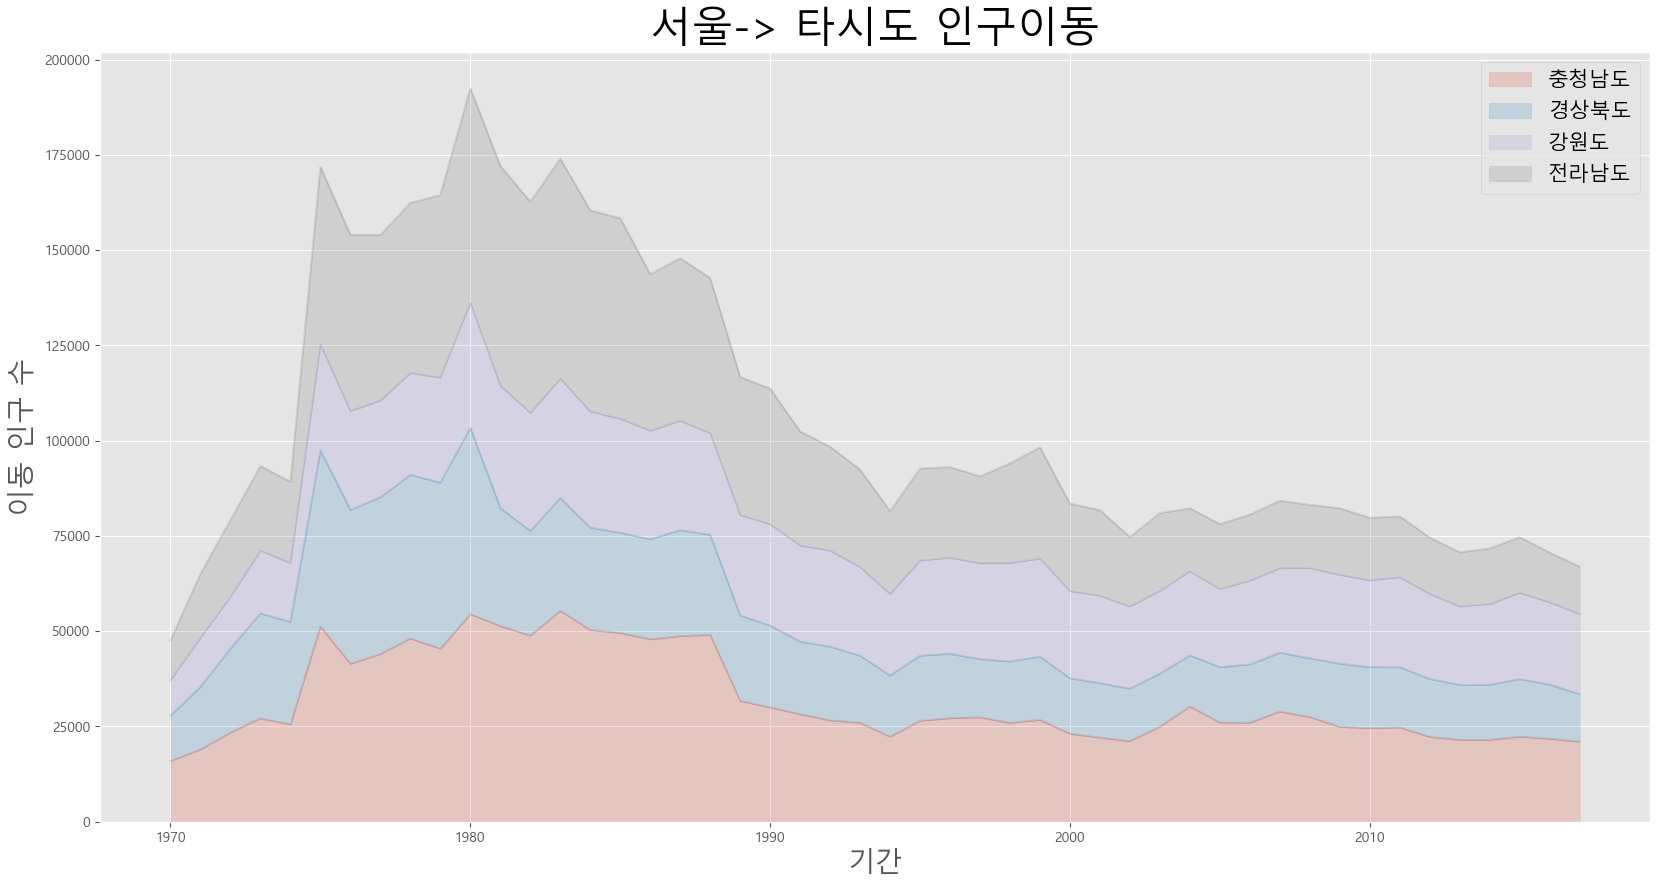

In [59]:
# 누적 그래프 그려보기 stackd = True 

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'],axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1 , inplace=True)
df_seoul.set_index('전입지',inplace=True)

# 서울에서 '충청남도','경상북도','강원도','전라남도'로 이동한 인구데이터 값만 선택
col_years = list(map(str,range(1970,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기

df_4.plot(kind='area',stacked=False, alpha=0.2, figsize=(20,10))

plt.title('서울 -> 타시도 인구이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best',fontsize=15)

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=True, alpha= 0.2, figsize=(20,10))

plt.title('서울-> 타시도 인구이동', size= 30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간',size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>


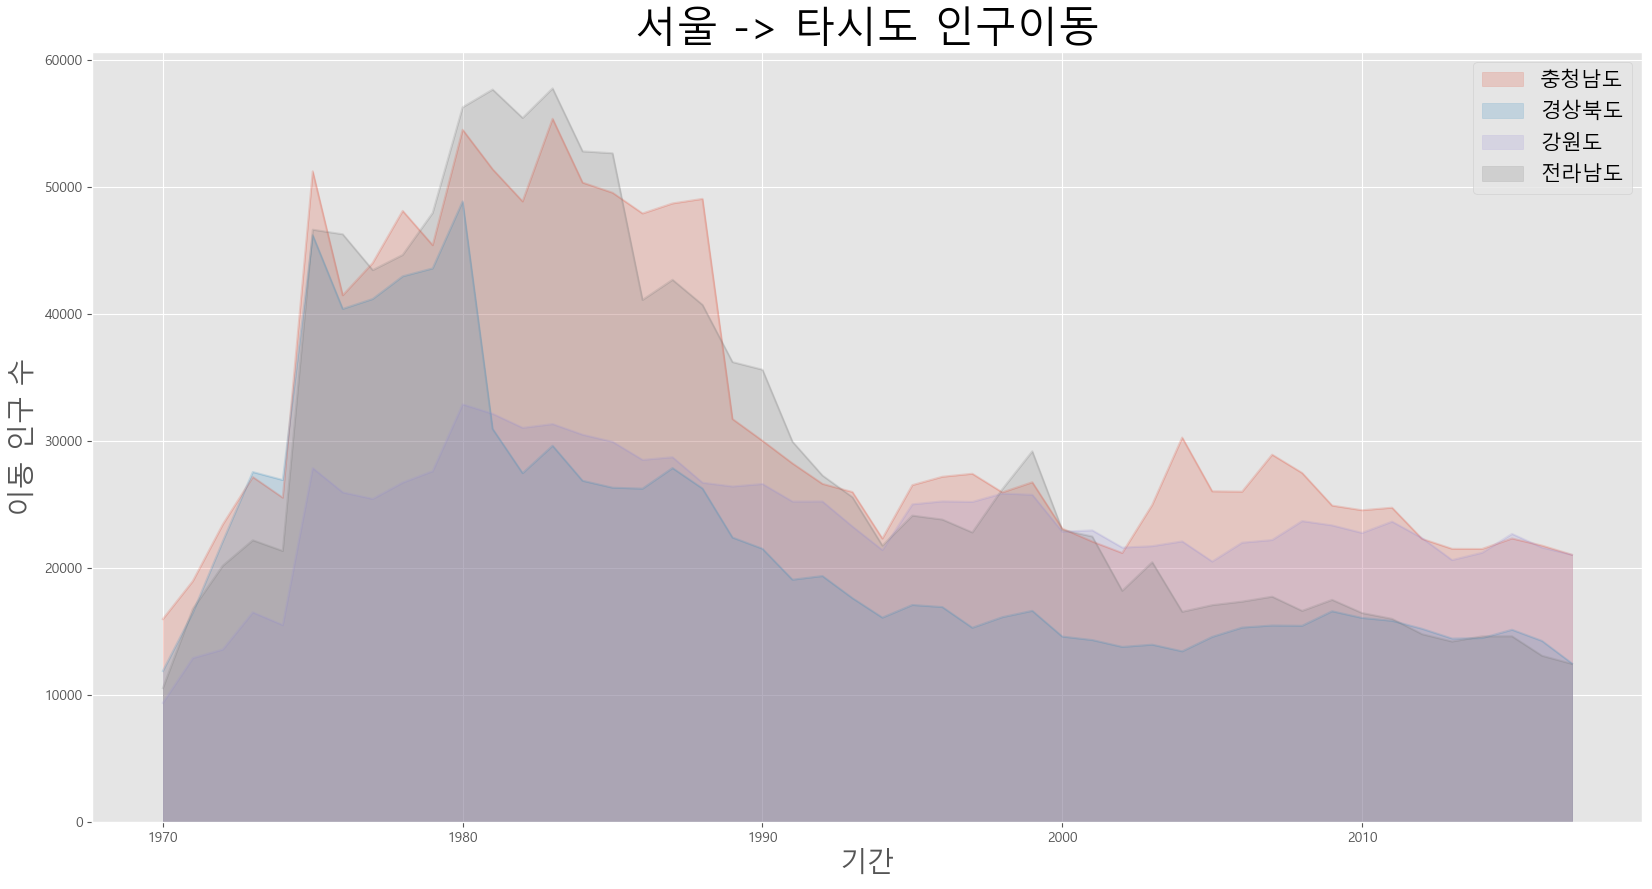

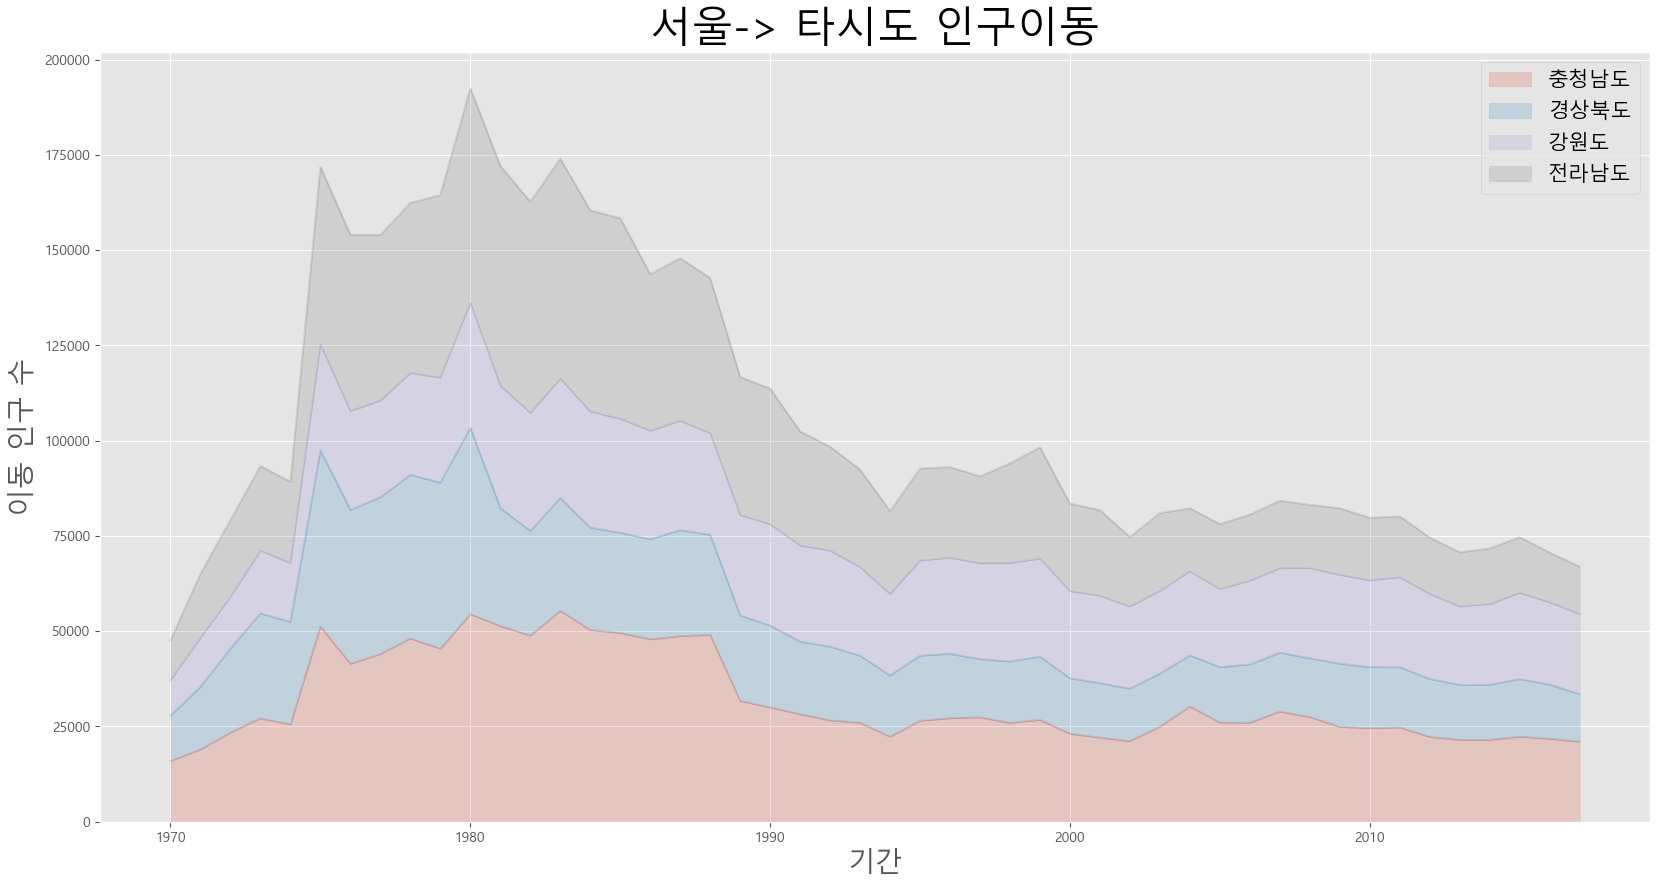

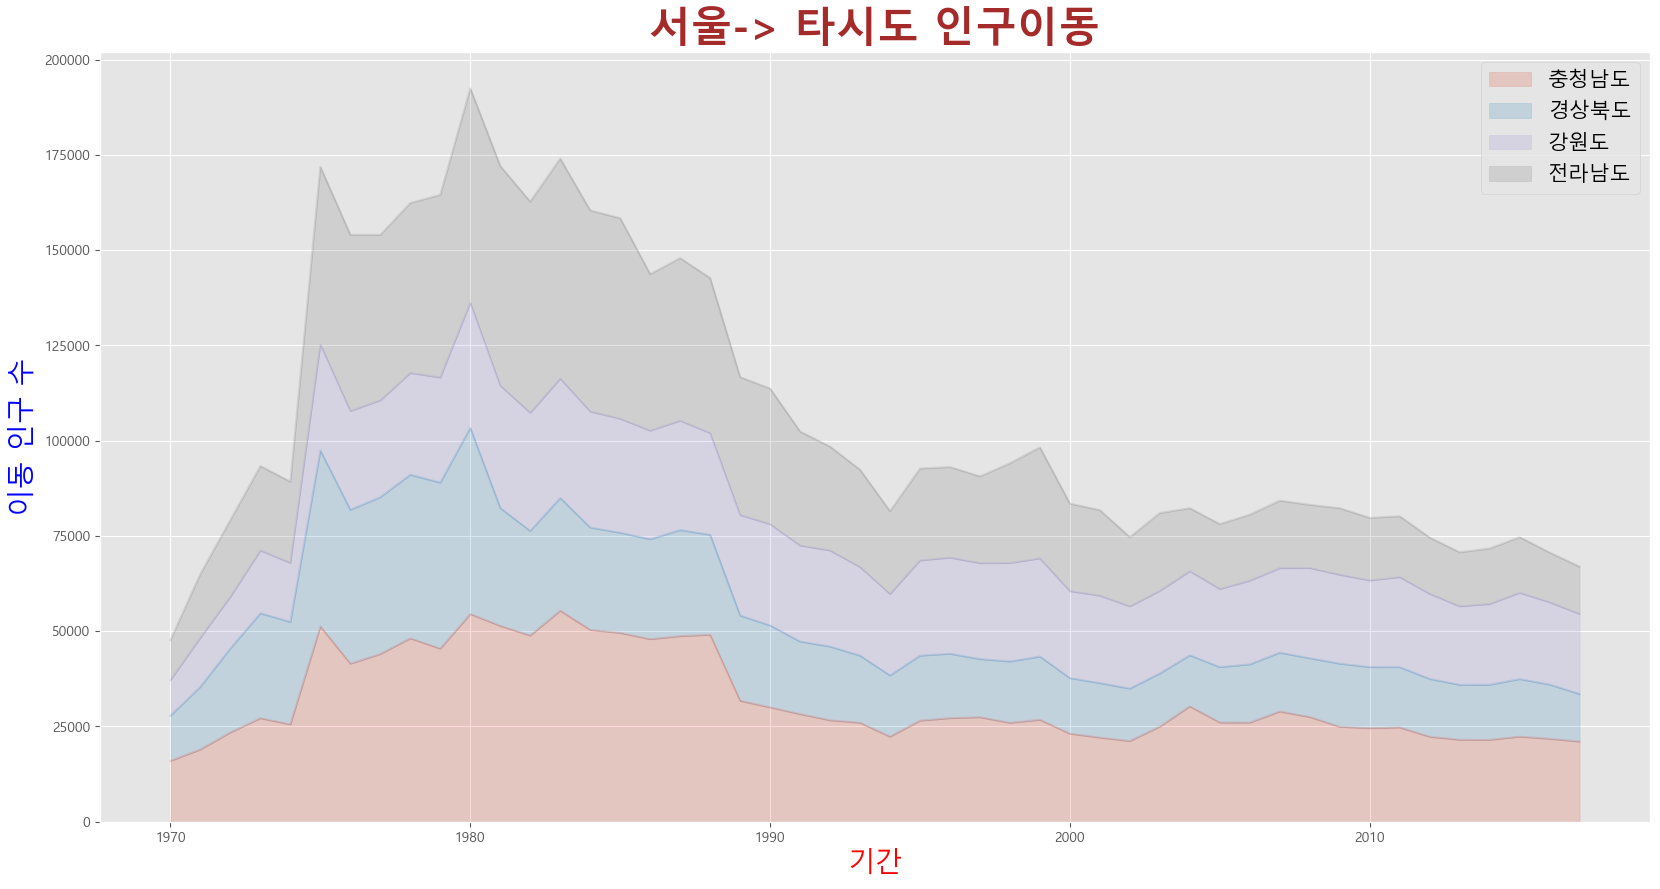

In [60]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'],axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1 , inplace=True)
df_seoul.set_index('전입지',inplace=True)

# 서울에서 '충청남도','경상북도','강원도','전라남도'로 이동한 인구데이터 값만 선택
col_years = list(map(str,range(1970,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기

df_4.plot(kind='area',stacked=False, alpha=0.2, figsize=(20,10))

plt.title('서울 -> 타시도 인구이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best',fontsize=15)

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=True, alpha= 0.2, figsize=(20,10))

plt.title('서울-> 타시도 인구이동', size= 30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간',size=20)
plt.legend(loc='best', fontsize=15)

ax = df_4.plot(kind='area', stacked=True, alpha = 0.2, figsize=(20,10))
print(type(ax))

# axe 객체 설정 변경
ax.set_title('서울-> 타시도 인구이동', size= 30, color='brown', weight='bold')
ax.set_ylabel('이동 인구 수', size=20, color='blue')
ax.set_xlabel('기간',size=20, color='red')
ax.legend(loc='best', fontsize=15)

plt.show()

# 막대 그래프
- 2010 ~ 2017년에 해당하는 데이터를 추출하기 위해, 27라인의 col_years 변수에 저장하는 값의 범위를 변경한다. 
- plot() 메소드의 color 옵션을 추가하여 막대 색상을 다르게 설정한다.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


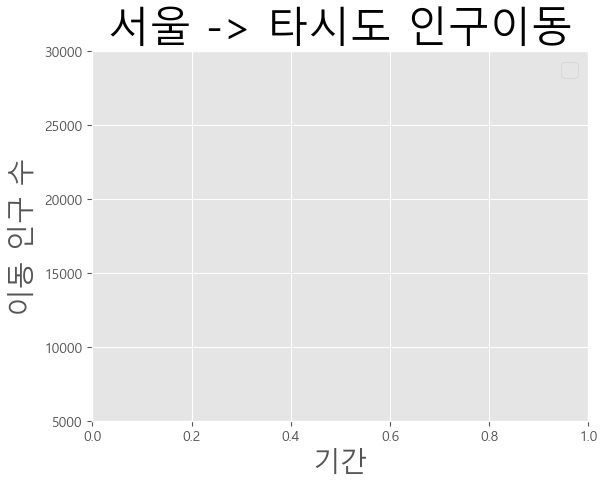

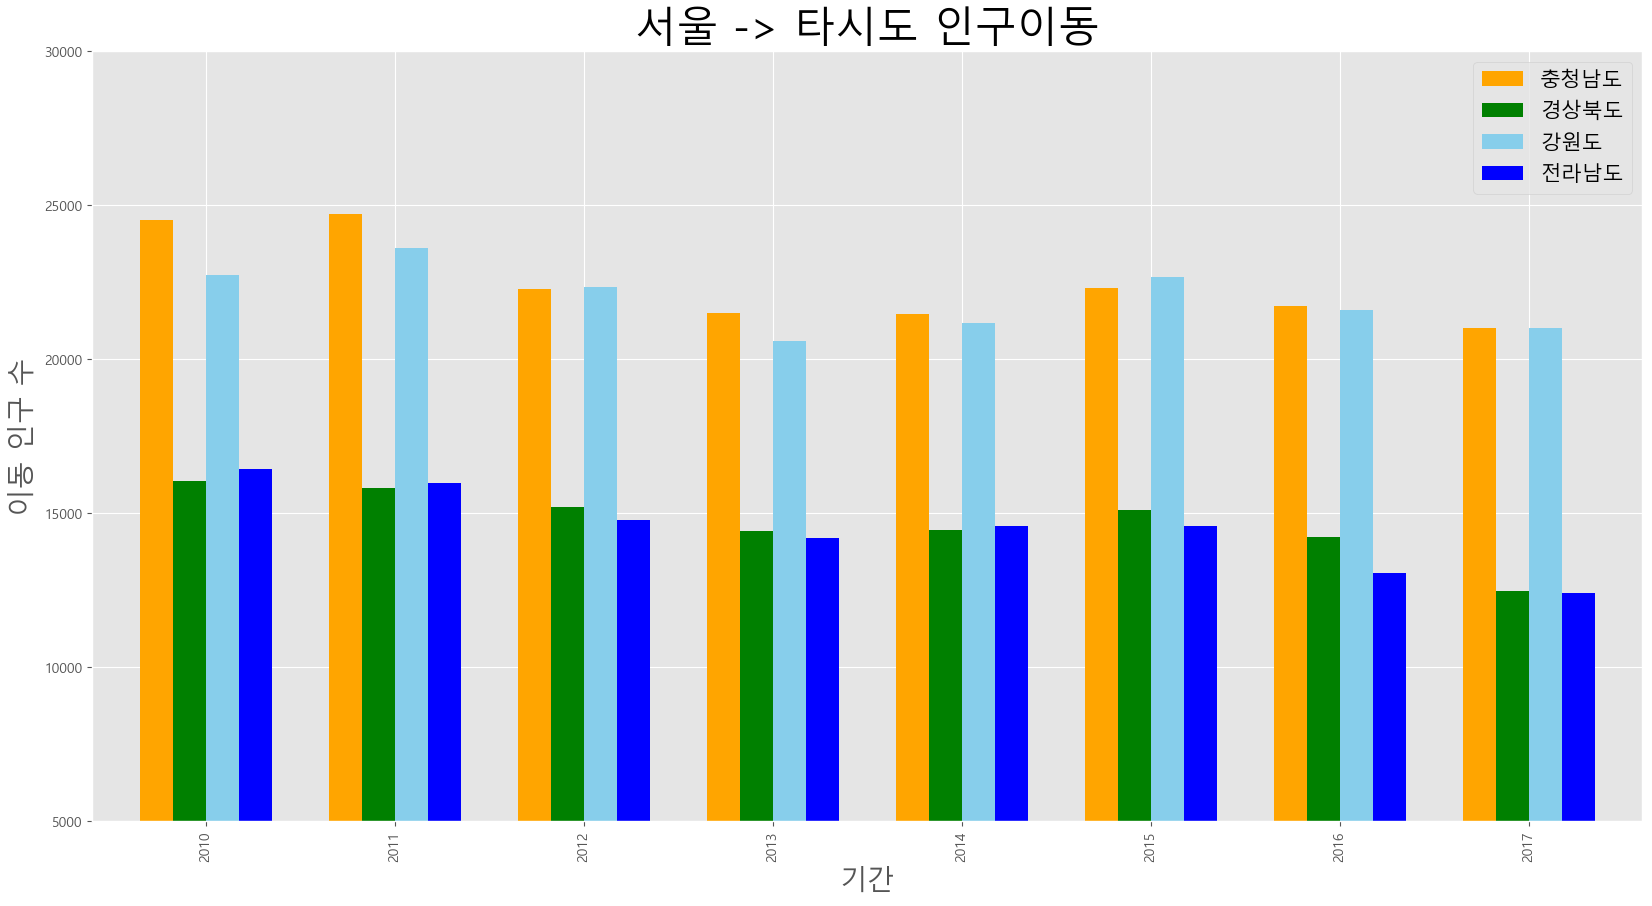

In [65]:
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'],axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1 , inplace=True)
df_seoul.set_index('전입지',inplace=True)

# 서울에서 '충청남도','경상북도','강원도','전라남도'로 이동한 인구데이터 값만 선택
col_years = list(map(str,range(2010,2018))) #2010-2018년 범위 ㅎ
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)


plt.title('서울 -> 타시도 인구이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000,30000)
plt.legend(loc='best',fontsize=15)

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 막대 그래프 그리기


df_4.plot(kind='bar', figsize=(20,10), width=0.7,
         color = ['orange','green','skyblue','blue'])

plt.title('서울 -> 타시도 인구이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000,30000)
plt.legend(loc='best',fontsize=15)

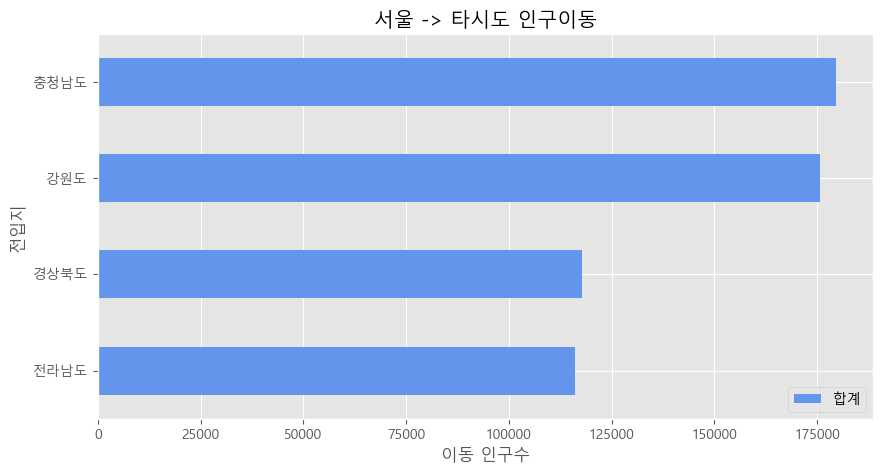

In [67]:
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'],axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1 , inplace=True)
df_seoul.set_index('전입지',inplace=True)

# 서울에서 '충청남도','경상북도','강원도','전라남도'로 이동한 인구데이터 값만 선택
col_years = list(map(str,range(2010,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]

# 2010 - 2017년 이동 인구 수를 합계하여 새로운 열로 추가 
df_4['합계'] = df_4.sum(axis=1)

# 가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)
# 데이터프레임 ㅎㅎㅎ 

# 스타일 서식 지정
plt.style.use('ggplot')


# 수평 막대 그래프 그리기

df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10,5))

plt.title('서울 -> 타시도 인구이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구수')
plt.show()



## 보조 축 활용하기 [2축 그래프 그리기]
- 예제에서 살펴보자

C:\Users\User\AppData\Local\Temp\ipykernel_2136\2101781343.py:24: FutureWarning: convert_float is deprecated and will be removed in a future version.
  df = pd.read_excel('./남북한발전전력량.xlsx', convert_float=True)


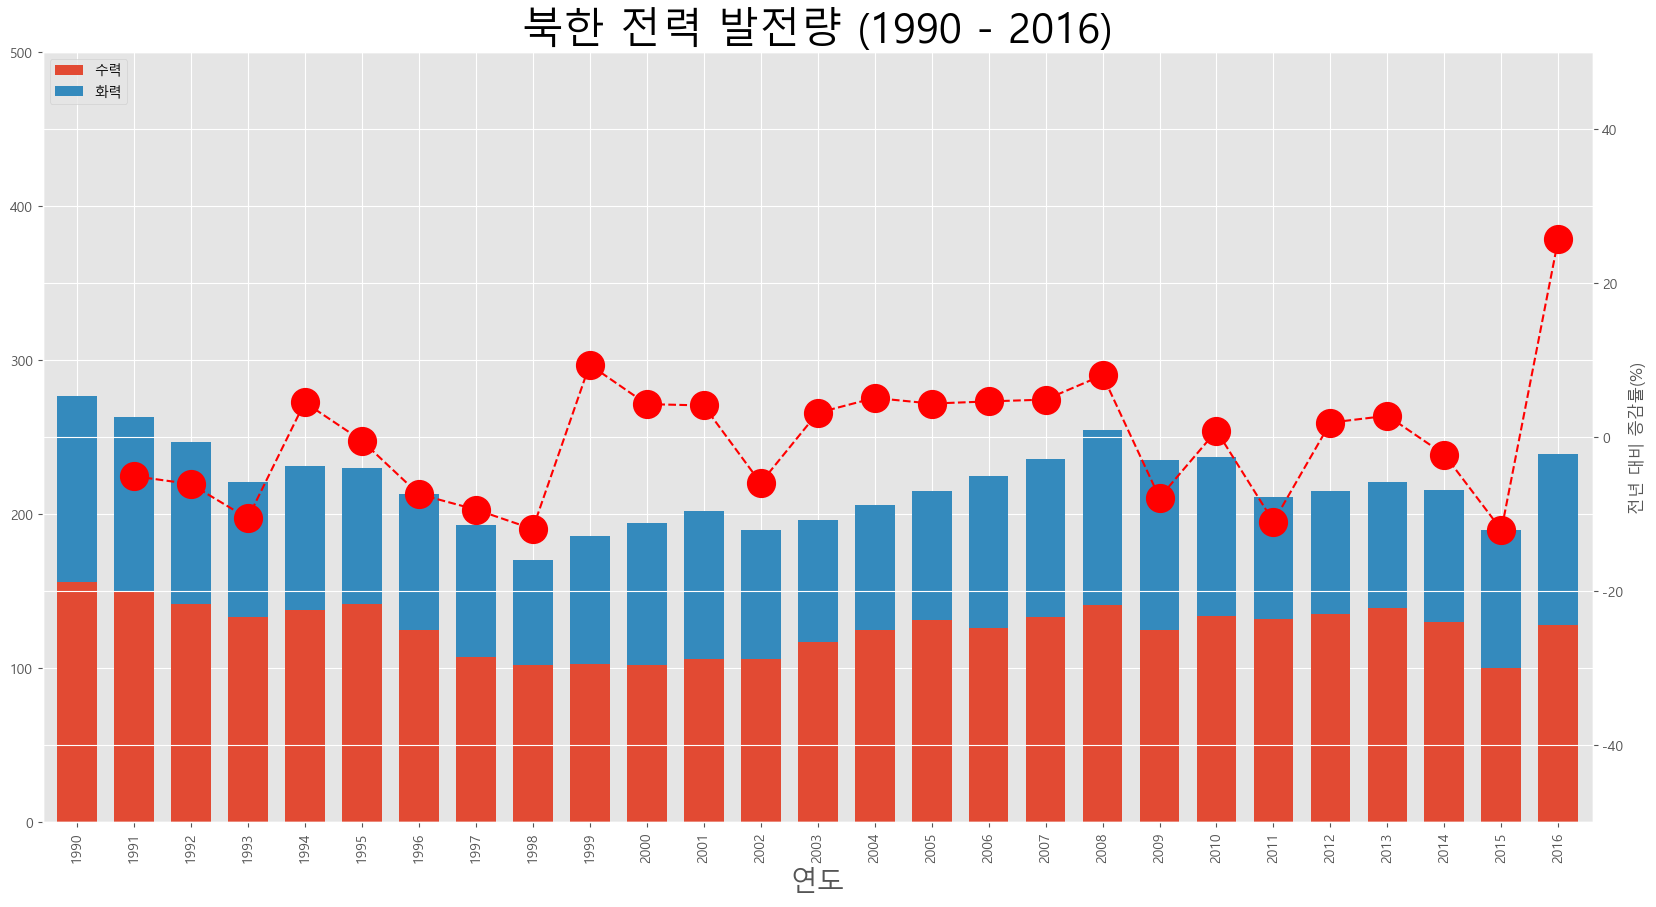

In [71]:
# [예제 4-18 2축 그래프 그리기]

import pandas as pd
import matplotlib.pyplot as plt

# 한글폰트 오류 해결하기
#운영 체제마다 한글이 보이게 하는 설정 

if platform.system() == 'Windows':  # 윈도우
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name() 
    rc('font', family=font_name)
#맥
elif platform.system() == 'Darwin': 
    rc('font', family='AppleGothic')
#리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
    
plt.style.use('ggplot') # 스타일 서식 지정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 출력 설정 

# Excel 데이터를 데이터프레임으로변환
df = pd.read_excel('./남북한발전전력량.xlsx', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df =df.T

# 증감률(변동률) 계산

df = df.rename(columns={'합계' : '총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1) # 행을 밀어버린다 
df['증감률'] = ((df['총발전량']/df['총발전량 - 1년'] - 1))  * 100 

# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar',figsize=(20,10), width=0.7 , stacked = True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감률, ls='--', marker='o', markersize=20,
        color='red', label='전년대비 증감률(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도', size=20)
ax2.set_ylabel('발전량(억kwh)')
ax2.set_ylabel('전년 대비 증감률(%)')

plt.title('북한 전력 발전량 (1990 - 2016)', size = 30)
ax1.legend(loc = 'upper left')

plt.show()

# 히스토그램
- 히스토그램(histogram)은 변수가 하나인 단변수 데이터의 변도수를 그래프로 표현한다.
- x축을 같은 크기의 여러 구간으로 나누고 각 구간에 속하는 데이터 값의 개수(빈도)를 y축에 표시한다.
- 구간을 나누는 간격의 크기에 따라 빈도가 달라지고 히스토그램의 모양이 변한다.

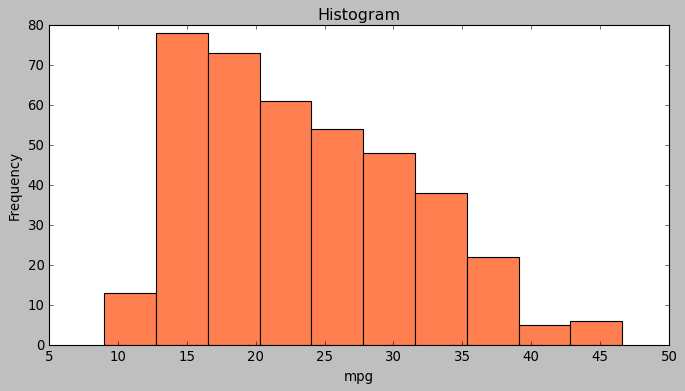

In [74]:
# 히스토그램 

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic') # 스타일 서식 지정

#read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열이름 지정
df.columns = ['mpg','cylinders','displacement','horesepower','weight',
            'acceleration','model year','origin','name']

# 연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10,5))

# 그래프 꾸미기
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

# 산점도
- 산점도(scatter plot)는 서로 다른 두 변수 사이의 관계를 나타낸다. 

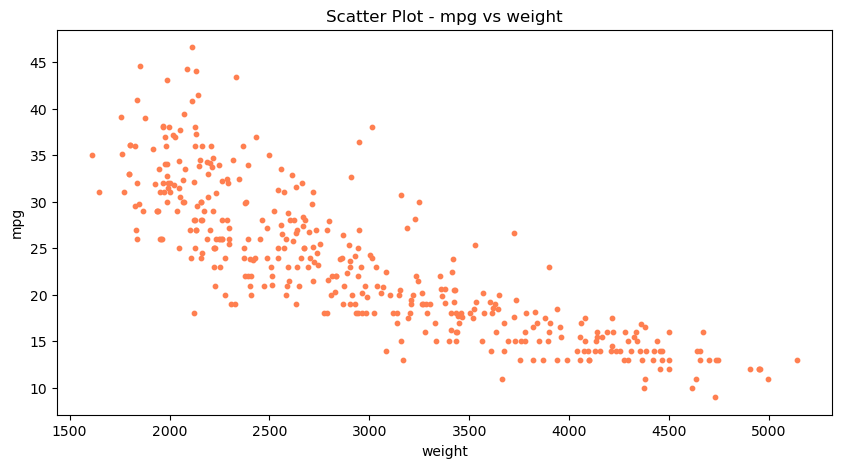

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header = None)

# 열 이름 지정 
df.columns = ['mpg','cylinders','displacement','horesepower','weight',
            'acceleration','model year','origin','name']

#연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(kind ='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.title('Scatter Plot - mpg vs weight')
plt.show()

# 버블 차트
- 점의 크기에 변화를 주면 모양이  비눗방울 같다고 해서 버블(bubble) 차트라고 부르기도 한다.

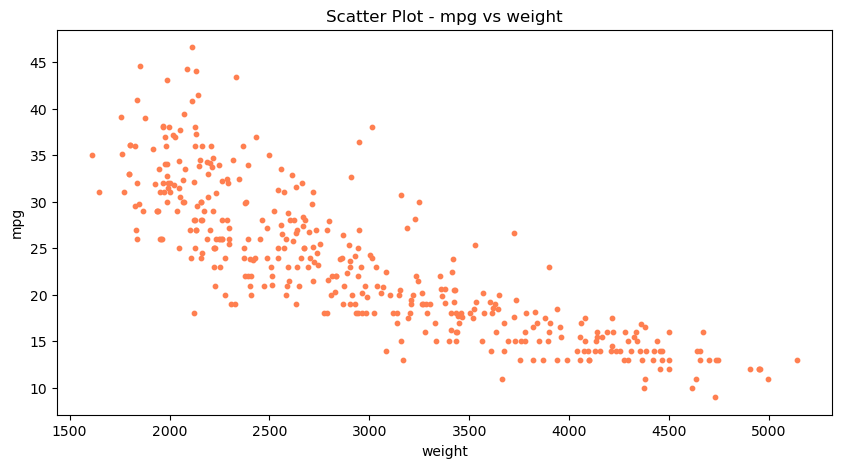

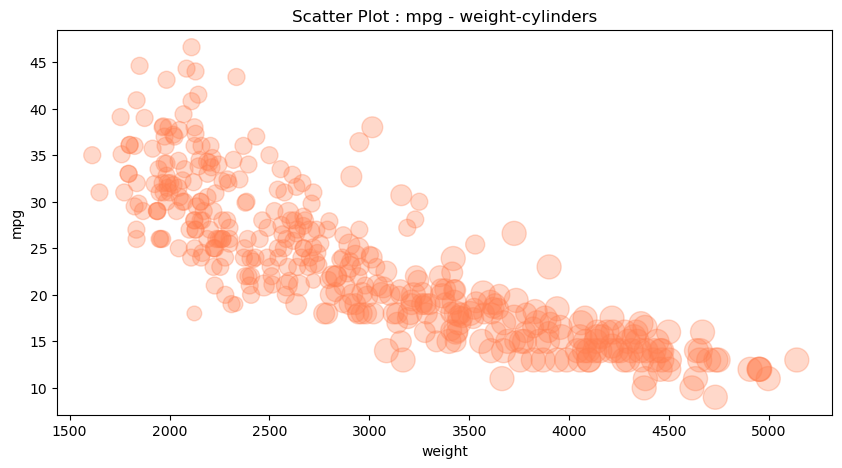

In [76]:
# cylinders 개수와 상대적 비율을 계산하여 시리즈 생성
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header = None)

# 열 이름 지정 
df.columns = ['mpg','cylinders','displacement','horesepower','weight',
            'acceleration','model year','origin','name']

#연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(kind ='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.title('Scatter Plot - mpg vs weight')

# cylinders 개수의 상대적 비율을 계산하여 시리즈 새성
cylinders_size = df.cylinders/df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', c='coral', figsize=(10,5),
        s=cylinders_size , alpha=0.3)

plt.title('Scatter Plot : mpg - weight-cylinders')
plt.show()

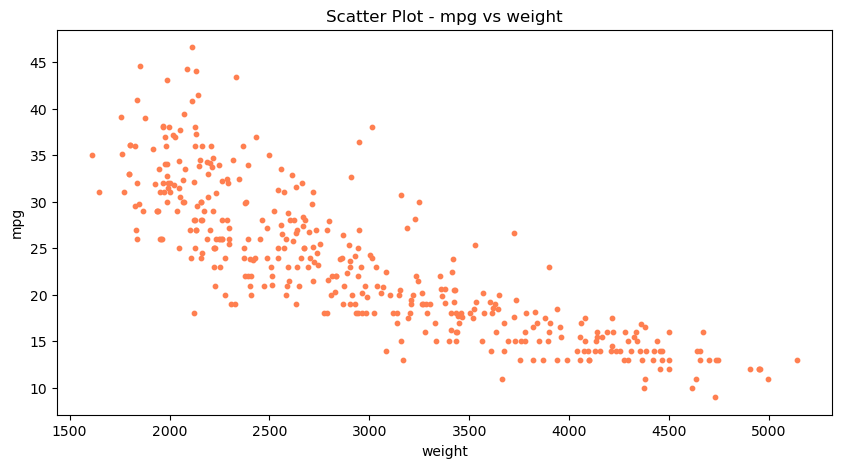

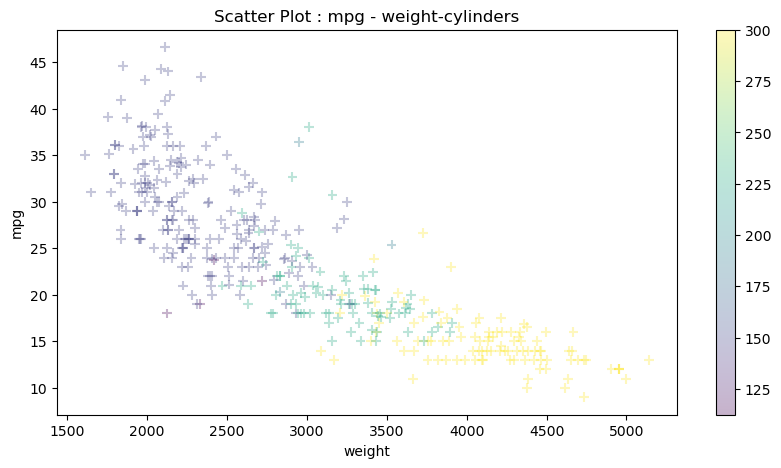

In [82]:
# 그림파일로 저장하기 

plt.style.use('default')

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header = None)

# 열 이름 지정 
df.columns = ['mpg','cylinders','displacement','horesepower','weight',
            'acceleration','model year','origin','name']

#연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(kind ='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.title('Scatter Plot - mpg vs weight')

# cylinders 개수의 상대적 비율을 계산하여 시리즈 새성
cylinders_size = df.cylinders/df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', marker='+', figsize=(10,5),
        cmap='viridis',c=cylinders_size , s= 50, alpha=0.3)

plt.title('Scatter Plot : mpg - weight-cylinders')
plt.savefig("./scatter.png")
plt.savefig("./scatter_transparent.png", transparent=True)
plt.show()

# 파이차트
- plot() 메소드에 kind='pie 옵션을 사용하여 그림
- 예제에서 '%1,1f%%' 옵션은 숫자를 %(퍼센트)로 나타내는데, 소수점 이하 첫째자리까지 표기한다는 뜻

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


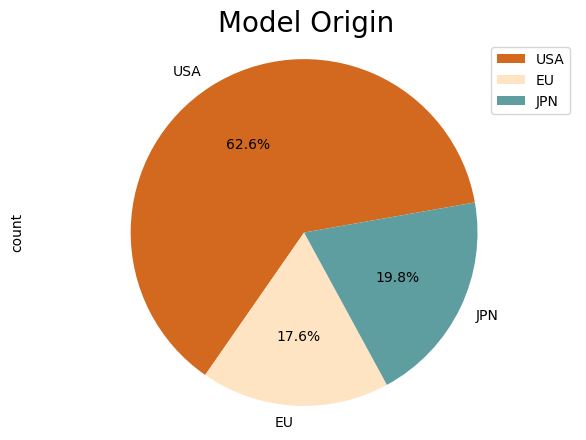

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default') # 스타일 서식 지정

df = pd.read_csv('./auto-mpg.csv', header = None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horesepower','weight',
            'acceleration','model year','origin','name']

# 데이터 개수 카운트를 위해 값 1을 가진 열 추가
df['count'] = 1
df_origin = df.groupby('origin').sum()
print(df_origin.head())

# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA','EU','JPN']

# 제조국가(origin) 열에 대한 파이 차트 그리기 - count 열 데이터 사용
df_origin['count'].plot(kind='pie',
                    figsize=(7,5),
                    startangle=10, 
                    autopct='%1.1f%%', # 소수점 나타내는 것을 생략 ㅎㅎ
                    colors=['chocolate','bisque','cadetblue']
                    )

plt.title('Model Origin', size=20)
plt.axis('equal') # 파이 차트의 비율을 같게(원에 가깝게) 조정
plt.legend(labels =df_origin.index, loc='upper right') # 범례 표시 
plt.show()

# 박스 플롯 
- 범주형 데이터의 분포를 파악하는 데 적합하다.

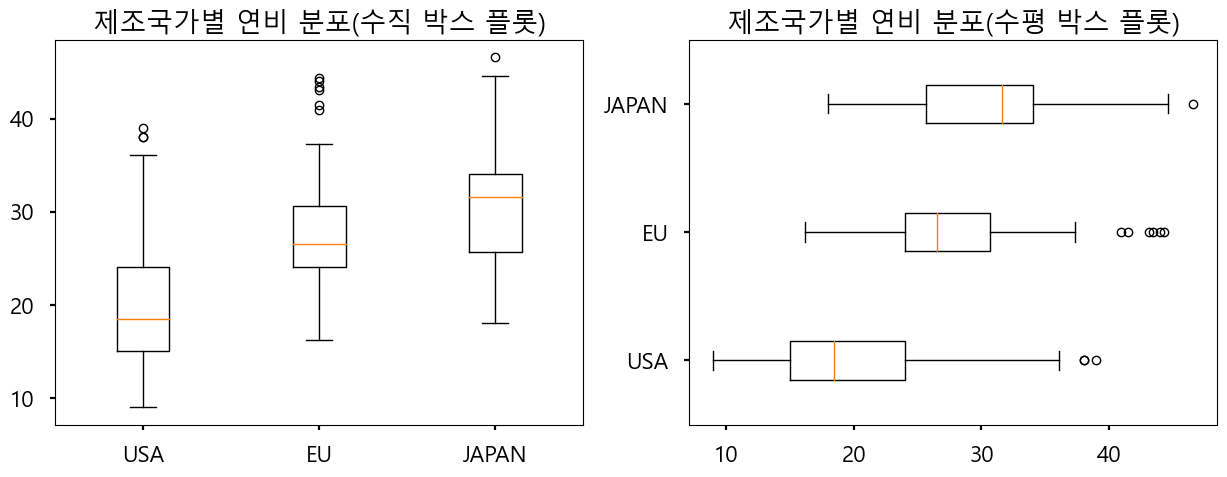

In [90]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

import platform
import matplotlib
from matplotlib import font_manager, rc 

matplotlib.rcParams['axes.unicode_minus'] = False  #'-' 부호가 제대로 표시되게 하는 설정 

#운영 체제마다 한글이 보이게 하는 설정 

if platform.system() == 'Windows':  # 윈도우
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name() 
    rc('font', family=font_name)
#맥
elif platform.system() == 'Darwin': 
    rc('font', family='AppleGothic')
#리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

plt.style.use('seaborn-poster')            # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# axe 객체에 boxplot 메서드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'],
         vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

# 파이썬 그래프 갤러리
- 파이썬으로 그릴 수 있는 다양한 그래프와 설정 옵션을 참조할 수 있는 사이트(The python graph gallery)를 소개한다.
- python-graph-gallery.com

In [91]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

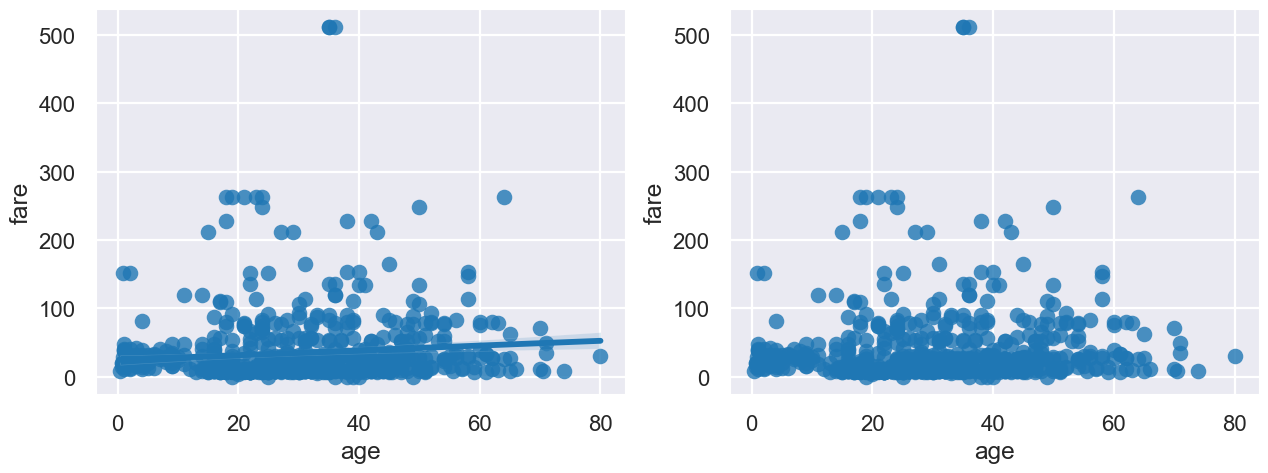

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')

sns.set_style('darkgrid')
#그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='age',
           y='fare',
           data=titanic,
           ax=ax1)

# 그래프 그리기 - 선형회귀선 미표시
sns.regplot(x='age',
           y='fare',
           data=titanic,
           ax=ax2,
           fit_reg=False)

plt.show()

# Folium 라이브러리 - 지도 활용
- Folium 라이브러리는 지도 위에 시각화할 때 유용한 도구이다. 세계 지도를 기본 지원하고 다양한 스타일의 지도 이미지를 제공하고 있다.
- Folium 사용하기 위해 라이브러리 설치는 필수

In [1]:
conda install -c conda-forge folium

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\anaconda3

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.6.0               |     pyhd8ed1ab_0          27 KB  conda-forge
    conda-22.11.1              |   py39hcbf5309_1         908 KB  conda-forge
    folium-0.14.0              |     pyhd8ed1ab_0          71 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ruamel.yaml-0.17.21        |   py39hb82d6ee_1         169 KB  conda-forge
    ruamel.yaml.clib-0.2.6     |   py39h2bbff1b_1         101 KB
    ------------------------------------------------------------
                                           Total:         1.3 MB

The following NEW packages will be INSTALLED:

  branca             conda-forge/noarch::branca-0.6.0-pyhd8ed1ab_0 None
 



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [12]:
# 지도 만들기
# Map() 함수를 이용하면 간단하게 지도 객체를 만들 수 있다. 
import folium

# 서울지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)

# 지도를 HTML 파일로 저장하기
seoul_map.save('./seoul.html')
seoul_map

In [16]:
import folium

# 서울지도 만들기
seoul_map2 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain',
                       zoom_start=12)
seoul_map3 = folium.Map(location=[37.55,126.98], tiles='Stamen Toner',
                       zoom_start=15)

# 지도를 HTML] 파일로 저장하기
seoul_map2.save('./seoul2.html')
seoul_map3.save('./seoul3.html')
seoul_map2
seoul_map3

In [11]:
# [예제 4-38] 지도에 마커 표시하기

import pandas as pd
import folium

# 대학교 리스트를 데이터프레임으로 변환
df = pd.read_excel('./서울지역 대학교 위치.xlsx')

# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain',
                       zoom_start=12)

# 대학교 위치 정보를 Marker로 표시
for name, lat,lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat,lng],popup=name).add_to(seoul_map)
    
# 지도를 HTML 파일로 저장하기
seoul_map.save('/seoul_colleges.html')


seoul_map

In [17]:
# [예제 4-38] 지도에 마커 표시하기

import pandas as pd
import folium

# 대학교 리스트를 데이터프레임으로 변환
df = pd.read_excel('./서울지역 대학교 위치.xlsx')

# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain',
                       zoom_start=12)

# 대학교 위치 정보를 Marker로 표시
for name, lat,lng in zip(df.index, df.위도, df.경도):
    folium.CircleMarker([lat,lng],
                       radius=10,
                       color='brown',
                       fill=True,
                       fill_color='coral',
                       fill_opacity=0.7,
                       popup=name
        ).add_to(seoul_map)
    
# 지도를 HTML 파일로 저장하기
seoul_map.save('/seoul_colleges2.html')


seoul_map

In [18]:
import pandas as pd
import folium
import json

# 경기도 인구 변화 데이터를 불러와서 데이터프레임으로 변환
file_path = './경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col='구분')
df.columns = df.columns.map(str)

# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path ='./경기도행정구역경계.json'

try:
    geo_data = json.load(open(geo_path,encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path,encoding='utf-8-sig'))
    
# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502,126.982], 
                   tiles='Stamen Terrain', zoom_start=9)

# 출력할 연도 선택(2007 ~ 2017년 중에서 선택)
year='2007'

# choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data=geo_data,
                 data = df[year],
                 columns =[df.index,df[year]],
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                 threshold_scale=[10000,100000,300000,500000,700000],
                 key_on='feature.properties.name',
                 ).add_to(g_map)

# 지도를 HTML 파이로 저장하기
g_map.save('./gyonggi_population_' + year + '.html')

g_map